In [1]:
## Analysis

In [2]:
## Libraries

In [3]:
import pandas as pd 
from heatmap import heatmap, corrplot
import pingouin as pg
import numpy as np
import pandas as pd
import seaborn as sns
from fitter import Fitter, get_common_distributions, get_distributions


In [4]:
## Dataset

In [5]:
data = pd.read_csv('survey_results.csv')  ## import csv file with the survey results
data.head()

Age  Gender Sexual_orientation       School        Religion  \
0   28    Male       Heterosexual     Bachelor         Atheist   
1   31    Male       Heterosexual  High school       Christian   
2   27  Female       Heterosexual       Master       Christian   
3   28    Male       Heterosexual       Master         Atheist   
4   27    Male       Heterosexual     Bachelor  Pastafarianism   

              Income  Personal_Sincerity  Personal_Loyalty  \
0  1600 - 2000 euros                   6                 7   
1  1000 - 1300 euros                   7                 7   
2  1000 - 1300 euros                   6                 8   
3  1600 - 2000 euros                   8                 8   
4   800 - 1000 euros                   6                 7   

   Personal_Self_confidence  Personal_Braveness  ...  Money_val  \
0                         4                   5  ...        0.0   
1                         4                   5  ...        NaN   
2                         4                   6  ...        5.0   
3                         8                   8  ...        2.0   
4                         5                   5  ...        NaN   

   Attractiveness_val  Intelligence_val  Charisma_val  Spirituality_val  \
0                 2.0              -1.0           2.0               1.0   
1                 NaN               NaN           NaN               NaN   
2                 3.0               2.0          -2.0              -1.0   
3                 3.0               1.0           0.0              -5.0   
4                 NaN               NaN           NaN               NaN   

   Generosity_val  Kindness_val  Adventurous_val  Fun_val  Energetic_val  
0             1.0           1.0              2.0      2.0            2.0  
1             NaN           NaN              NaN      NaN            NaN  
2             0.0          -1.0             -1.0     -1.0           -1.0  
3             0.0           0.0              0.0      0.0           -4.0  
4             NaN           NaN              NaN      NaN            NaN  

[5 rows x 136 columns]

In [6]:
## Define some functions

In [7]:
## perform anova (1 way or 2 way)

def anova_test(var_num, var_bins, dframe):
    an = pg.anova(dv=var_num, between=var_bins, data=dframe, ss_type=2,detailed=False,effsize='np2').round(3)
    return print(an)

In [8]:
## better distribution

def dist_data(parameter):
    par = parameter.values    ## Before we supply the data to Fitter we need to convert it to a NumPy array. 
    f = Fitter(par, distributions= get_common_distributions())   ## check distr
    f.fit()                                                       ## try to fit
    f.summary()                                                   ## sumarise all info
    return f.get_best(method = 'sumsquare_error')   ## get best distribution

# Analysis by parameter
## Age

{'cauchy': (27.588176444748562, 3.406606985986511)}

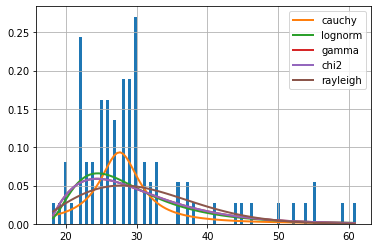

In [9]:
dist_data(data['Age'])           ## follows a cauchy distribution

## School

{'exponpow': (13.51416984285008, -11.001235360718931, 16.182099676468937)}

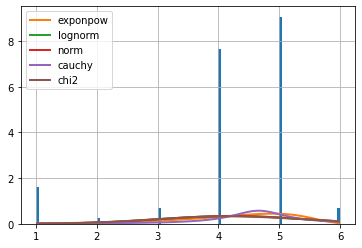

In [10]:
dist_data(data['School_nm'])           ## follows a exponpow distribution

## Income

{'gamma': (0.4196635327908217, -1.1671722320204838e-24, 1.5667707818846683)}

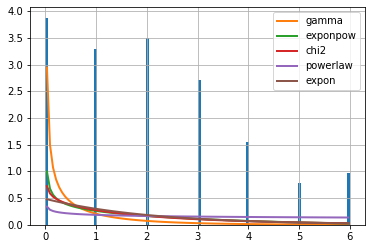

In [11]:
dist_data(data['Income_nm'])           ## follows a gama distribution

# Personal Characteristics

## Personal_Sincerity

In [12]:
anova_test('Personal_Sincerity', 'Age', data)

  Source  ddof1  ddof2      F  p-unc    np2
0    Age     28     57  1.691  0.047  0.454


In [13]:
anova_test('Personal_Sincerity', 'Age_nm', data)

   Source  ddof1  ddof2      F  p-unc    np2
0  Age_nm      9     76  1.325  0.239  0.136


In [14]:
anova_test('Personal_Sincerity', 'School_nm', data)

      Source  ddof1  ddof2      F  p-unc    np2
0  School_nm      5     80  1.406  0.231  0.081


In [15]:
anova_test('Personal_Sincerity', 'Income_nm', data)

      Source  ddof1  ddof2      F  p-unc    np2
0  Income_nm      6     79  1.263  0.284  0.088


In [16]:
anova_test('Personal_Sincerity', 'Gender', data)

   Source  ddof1  ddof2      F  p-unc    np2
0  Gender      1     84  4.646  0.034  0.052


In [17]:
anova_test('Personal_Sincerity', 'Relationship', data)

         Source  ddof1  ddof2      F  p-unc    np2
0  Relationship      1     84  1.057  0.307  0.012


In [18]:
anova_test('Personal_Sincerity', ['Age','Gender'], data)

         Source        SS    DF       MS       F  p-unc    np2
0           Age  6425.929  28.0  229.497  84.829  0.000  0.982
1        Gender     4.625   1.0    4.625   1.710  0.198  0.038
2  Age * Gender   167.204  28.0    5.972   2.207  0.009  0.590
3      Residual   116.333  43.0    2.705     NaN    NaN    NaN


C:\Users\catar\anaconda3\envs\Ironhack\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 28, but rank is 15
  warnings.warn('covariance of constraints does not have full '


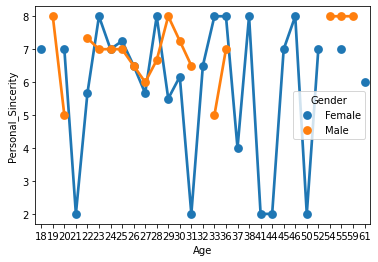

In [19]:
abc = data.groupby(['Age','Gender'], as_index=False).mean()
ax = sns.pointplot(x='Age', y='Personal_Sincerity', hue='Gender', data=abc)

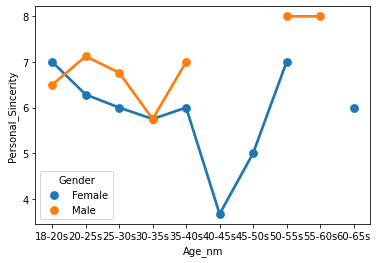

In [20]:
abc = data.groupby(['Age_nm','Gender'], as_index=False).mean()
ax = sns.pointplot(x='Age_nm', y='Personal_Sincerity', hue='Gender', data=abc)

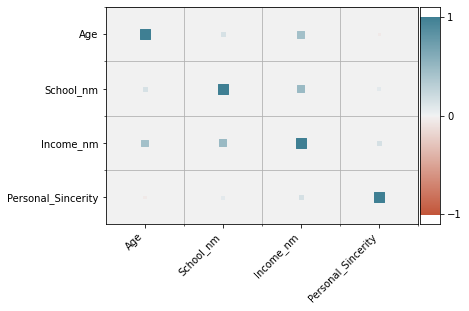

In [21]:
df_me_sin = data[['Age','School_nm','Income_nm','Personal_Sincerity']]

corrplot(df_me_sin.corr(), size_scale=100, marker='s')  ## use in dataframe

## Personal_Loyalty

In [22]:
anova_test('Personal_Loyalty', 'Age', data)

  Source  ddof1  ddof2      F  p-unc    np2
0    Age     28     57  1.896  0.021  0.482


In [23]:
anova_test('Personal_Loyalty', 'Age_nm', data)

   Source  ddof1  ddof2      F  p-unc    np2
0  Age_nm      9     76  1.582  0.136  0.158


In [24]:
anova_test('Personal_Loyalty', 'School_nm', data)

      Source  ddof1  ddof2      F  p-unc    np2
0  School_nm      5     80  2.332   0.05  0.127


In [25]:
anova_test('Personal_Loyalty', 'Income_nm', data)

      Source  ddof1  ddof2      F  p-unc    np2
0  Income_nm      6     79  0.749  0.612  0.054


In [26]:
anova_test('Personal_Loyalty', 'Gender', data)

   Source  ddof1  ddof2      F  p-unc    np2
0  Gender      1     84  7.182  0.009  0.079


In [27]:
anova_test('Personal_Loyalty', 'Relationship', data)

         Source  ddof1  ddof2      F  p-unc    np2
0  Relationship      1     84  0.555  0.458  0.007


In [28]:
anova_test('Personal_Loyalty', ['Age','Gender'], data)

         Source        SS    DF       MS       F  p-unc    np2
0           Age  7556.453  28.0  269.873  98.552  0.000  0.985
1        Gender    10.896   1.0   10.896   3.979  0.052  0.085
2  Age * Gender   202.150  28.0    7.220   2.636  0.002  0.632
3      Residual   117.750  43.0    2.738     NaN    NaN    NaN


C:\Users\catar\anaconda3\envs\Ironhack\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 28, but rank is 15
  warnings.warn('covariance of constraints does not have full '


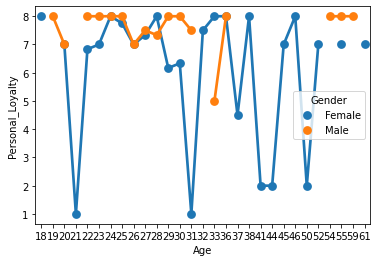

In [29]:
abc = data.groupby(['Age','Gender'], as_index=False).mean()
ax = sns.pointplot(x='Age', y='Personal_Loyalty', hue='Gender', data=abc)

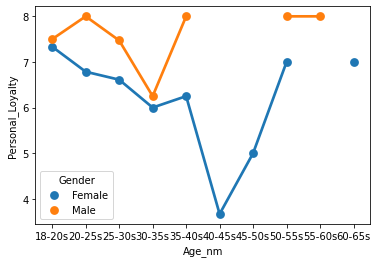

In [30]:
abc = data.groupby(['Age_nm','Gender'], as_index=False).mean()
ax = sns.pointplot(x='Age_nm', y='Personal_Loyalty', hue='Gender', data=abc)

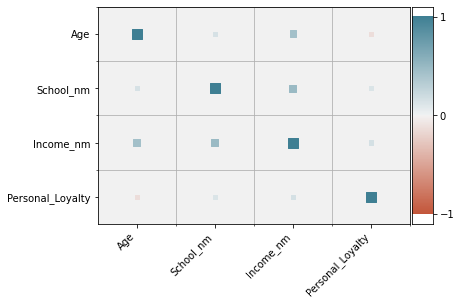

In [31]:
df_me_sin = data[['Age','School_nm','Income_nm','Personal_Loyalty']]
corrplot(df_me_sin.corr(), size_scale=100, marker='s')  ## use in dataframe

## Personal_Self_confidence

In [32]:
anova_test('Personal_Self_confidence', 'Age', data)

  Source  ddof1  ddof2      F  p-unc    np2
0    Age     28     57  1.849  0.025  0.476


In [33]:
anova_test('Personal_Self_confidence', 'Age_nm', data)

   Source  ddof1  ddof2      F  p-unc    np2
0  Age_nm      9     76  1.824  0.077  0.178


In [34]:
anova_test('Personal_Self_confidence', 'School_nm', data)

      Source  ddof1  ddof2      F  p-unc    np2
0  School_nm      5     80  1.838  0.115  0.103


In [35]:
anova_test('Personal_Self_confidence', 'Income_nm', data)

      Source  ddof1  ddof2      F  p-unc    np2
0  Income_nm      6     79  1.855  0.099  0.123


In [36]:
anova_test('Personal_Self_confidence', 'Gender', data)

   Source  ddof1  ddof2     F  p-unc    np2
0  Gender      1     84  14.7    0.0  0.149


In [37]:
anova_test('Personal_Self_confidence', 'Relationship', data)

         Source  ddof1  ddof2     F  p-unc  np2
0  Relationship      1     84  0.02  0.887  0.0


In [38]:
anova_test('Personal_Self_confidence', ['Age','Gender'], data)

         Source        SS    DF       MS       F  p-unc    np2
0           Age  3925.716  28.0  140.204  64.884  0.000  0.977
1        Gender    17.943   1.0   17.943   8.304  0.006  0.162
2  Age * Gender   177.021  28.0    6.322   2.926  0.001  0.656
3      Residual    92.917  43.0    2.161     NaN    NaN    NaN


C:\Users\catar\anaconda3\envs\Ironhack\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 28, but rank is 15
  warnings.warn('covariance of constraints does not have full '


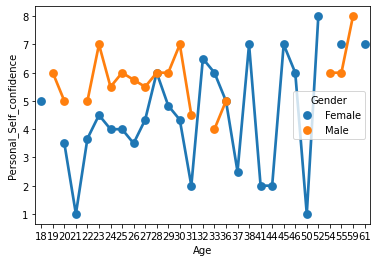

In [39]:
abc = data.groupby(['Age','Gender'], as_index=False).mean()
ax = sns.pointplot(x='Age', y='Personal_Self_confidence', hue='Gender', data=abc)

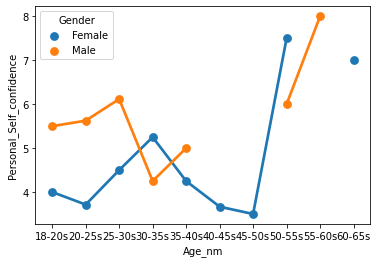

In [40]:
abc = data.groupby(['Age_nm','Gender'], as_index=False).mean()
ax = sns.pointplot(x='Age_nm', y='Personal_Self_confidence', hue='Gender', data=abc)

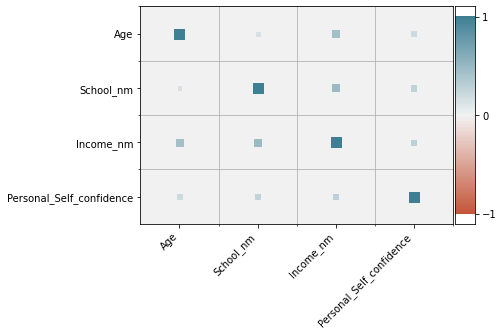

In [41]:
df_me_sin = data[['Age','School_nm','Income_nm','Personal_Self_confidence']]
corrplot(df_me_sin.corr(), size_scale=100, marker='s')  ## use in dataframe

## Personal_Braveness

In [42]:
anova_test('Personal_Braveness', 'Age', data)

  Source  ddof1  ddof2      F  p-unc    np2
0    Age     28     57  1.456  0.115  0.417


In [43]:
anova_test('Personal_Braveness', 'Age_nm', data)

   Source  ddof1  ddof2      F  p-unc    np2
0  Age_nm      9     76  1.395  0.206  0.142


In [44]:
anova_test('Personal_Braveness', 'School_nm', data)

      Source  ddof1  ddof2      F  p-unc    np2
0  School_nm      5     80  2.167  0.066  0.119


In [45]:
anova_test('Personal_Braveness', 'Income_nm', data)

      Source  ddof1  ddof2     F  p-unc  np2
0  Income_nm      6     79  1.46  0.203  0.1


In [46]:
anova_test('Personal_Braveness', 'Gender', data)

   Source  ddof1  ddof2      F  p-unc   np2
0  Gender      1     84  5.339  0.023  0.06


In [47]:
anova_test('Personal_Braveness', 'Relationship', data)

         Source  ddof1  ddof2      F  p-unc  np2
0  Relationship      1     84  0.013  0.908  0.0


In [48]:
anova_test('Personal_Braveness', ['Age','Gender'], data)

         Source        SS    DF       MS       F  p-unc    np2
0           Age  4426.929  28.0  158.105  61.618  0.000  0.976
1        Gender     2.646   1.0    2.646   1.031  0.316  0.023
2  Age * Gender   155.098  28.0    5.539   2.159  0.011  0.584
3      Residual   110.333  43.0    2.566     NaN    NaN    NaN


C:\Users\catar\anaconda3\envs\Ironhack\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 28, but rank is 15
  warnings.warn('covariance of constraints does not have full '


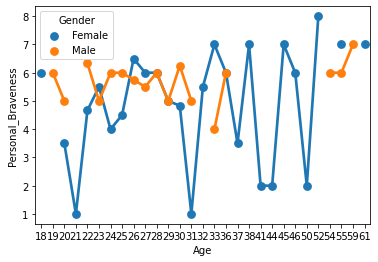

In [49]:
abc = data.groupby(['Age','Gender'], as_index=False).mean()
ax = sns.pointplot(x='Age', y='Personal_Braveness', hue='Gender', data=abc)

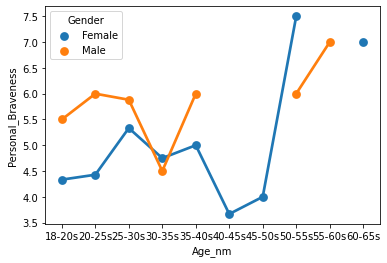

In [50]:
abc = data.groupby(['Age_nm','Gender'], as_index=False).mean()
ax = sns.pointplot(x='Age_nm', y='Personal_Braveness', hue='Gender', data=abc)

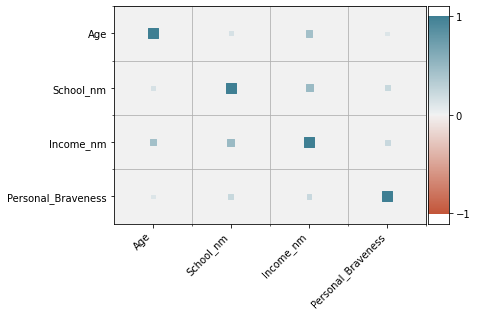

In [51]:
df_me_sin = data[['Age','School_nm','Income_nm','Personal_Braveness']]
corrplot(df_me_sin.corr(), size_scale=100, marker='s')  ## use in dataframe

## Personal_Optimism

In [52]:
anova_test('Personal_Optimism', 'Age', data)

  Source  ddof1  ddof2     F  p-unc    np2
0    Age     28     57  1.66  0.053  0.449


In [53]:
anova_test('Personal_Optimism', 'Age_nm', data)

   Source  ddof1  ddof2      F  p-unc    np2
0  Age_nm      9     76  1.006  0.443  0.106


In [54]:
anova_test('Personal_Optimism', 'School_nm', data)

      Source  ddof1  ddof2      F  p-unc    np2
0  School_nm      5     80  1.243  0.297  0.072


In [55]:
anova_test('Personal_Optimism', 'Income_nm', data)

      Source  ddof1  ddof2      F  p-unc   np2
0  Income_nm      6     79  1.303  0.266  0.09


In [56]:
anova_test('Personal_Optimism', 'Gender', data)

   Source  ddof1  ddof2      F  p-unc    np2
0  Gender      1     84  7.896  0.006  0.086


In [57]:
anova_test('Personal_Optimism', 'Relationship', data)

         Source  ddof1  ddof2      F  p-unc  np2
0  Relationship      1     84  0.028  0.868  0.0


In [58]:
anova_test('Personal_Optimism', ['Age','Gender'], data)

         Source        SS    DF       MS       F  p-unc    np2
0           Age  4917.084  28.0  175.610  61.475  0.000  0.976
1        Gender    10.540   1.0   10.540   3.690  0.061  0.079
2  Age * Gender   181.014  28.0    6.465   2.263  0.008  0.596
3      Residual   122.833  43.0    2.857     NaN    NaN    NaN


C:\Users\catar\anaconda3\envs\Ironhack\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 28, but rank is 15
  warnings.warn('covariance of constraints does not have full '


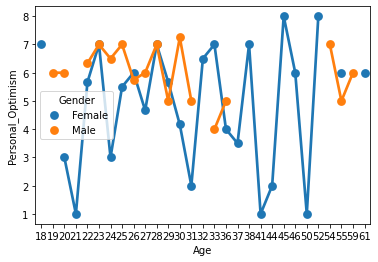

In [59]:
abc = data.groupby(['Age','Gender'], as_index=False).mean()
ax = sns.pointplot(x='Age', y='Personal_Optimism', hue='Gender', data=abc)

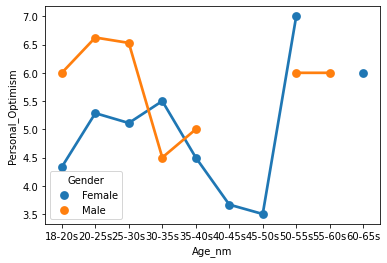

In [60]:
abc = data.groupby(['Age_nm','Gender'], as_index=False).mean()
ax = sns.pointplot(x='Age_nm', y='Personal_Optimism', hue='Gender', data=abc)

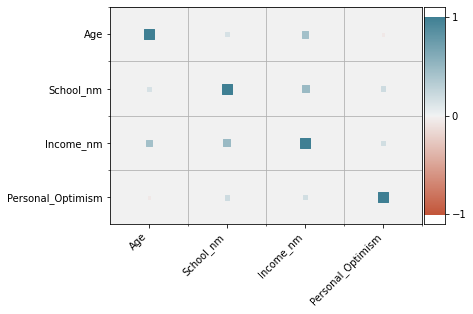

In [61]:
df_me_sin = data[['Age','School_nm','Income_nm','Personal_Optimism']]
corrplot(df_me_sin.corr(), size_scale=100, marker='s')  ## use in dataframe

## Personal_Money

In [62]:
anova_test('Personal_Money', 'Age', data)

  Source  ddof1  ddof2      F  p-unc    np2
0    Age     28     57  1.236  0.245  0.378


In [63]:
anova_test('Personal_Money', 'Age_nm', data)

   Source  ddof1  ddof2     F  p-unc    np2
0  Age_nm      9     76  0.88  0.547  0.094


In [64]:
anova_test('Personal_Money', 'School_nm', data)

      Source  ddof1  ddof2      F  p-unc    np2
0  School_nm      5     80  0.723  0.608  0.043


In [65]:
anova_test('Personal_Money', 'Income_nm', data)

      Source  ddof1  ddof2      F  p-unc    np2
0  Income_nm      6     79  4.074  0.001  0.236


In [66]:
anova_test('Personal_Money', 'Gender', data)

   Source  ddof1  ddof2      F  p-unc    np2
0  Gender      1     84  3.319  0.072  0.038


In [67]:
anova_test('Personal_Money', 'Relationship', data)

         Source  ddof1  ddof2      F  p-unc    np2
0  Relationship      1     84  0.726  0.397  0.009


In [68]:
anova_test('Personal_Money', ['Age','Gender'], data)

         Source        SS    DF      MS       F  p-unc    np2
0           Age  2620.936  28.0  93.605  32.394  0.000  0.955
1        Gender     0.828   1.0   0.828   0.287  0.595  0.007
2  Age * Gender   148.677  28.0   5.310   1.838  0.035  0.545
3      Residual   124.250  43.0   2.890     NaN    NaN    NaN


C:\Users\catar\anaconda3\envs\Ironhack\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 28, but rank is 15
  warnings.warn('covariance of constraints does not have full '


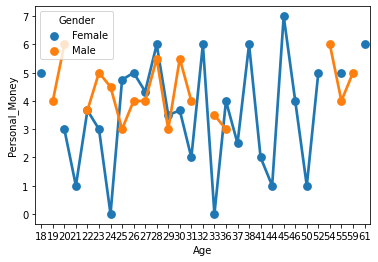

In [69]:
abc = data.groupby(['Age','Gender'], as_index=False).mean()
ax = sns.pointplot(x='Age', y='Personal_Money', hue='Gender', data=abc)

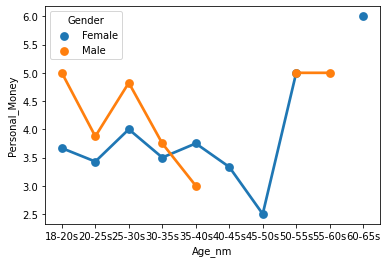

In [70]:
abc = data.groupby(['Age_nm','Gender'], as_index=False).mean()
ax = sns.pointplot(x='Age_nm', y='Personal_Money', hue='Gender', data=abc)

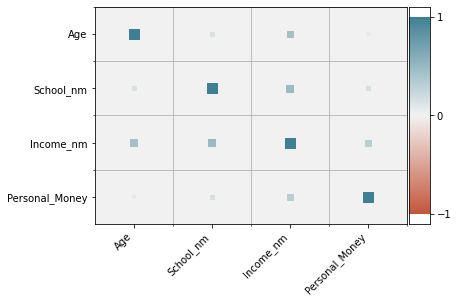

In [71]:
df_me_sin = data[['Age','School_nm','Income_nm','Personal_Money']]
corrplot(df_me_sin.corr(), size_scale=100, marker='s')  ## use in dataframe

## Personal_Attractiveness

In [72]:
anova_test('Personal_Attractiveness', 'Age', data)

  Source  ddof1  ddof2      F  p-unc    np2
0    Age     28     57  1.844  0.025  0.475


In [73]:
anova_test('Personal_Attractiveness', 'Age_nm', data)

   Source  ddof1  ddof2      F  p-unc    np2
0  Age_nm      9     76  1.337  0.232  0.137


In [74]:
anova_test('Personal_Attractiveness', 'School_nm', data)

      Source  ddof1  ddof2      F  p-unc    np2
0  School_nm      5     80  2.021  0.084  0.112


In [75]:
anova_test('Personal_Attractiveness', 'Income_nm', data)

      Source  ddof1  ddof2      F  p-unc    np2
0  Income_nm      6     79  1.898  0.091  0.126


In [76]:
anova_test('Personal_Attractiveness', 'Gender', data)

   Source  ddof1  ddof2      F  p-unc    np2
0  Gender      1     84  0.166  0.685  0.002


In [77]:
anova_test('Personal_Attractiveness', 'Relationship', data)

         Source  ddof1  ddof2      F  p-unc  np2
0  Relationship      1     84  0.019  0.891  0.0


In [78]:
anova_test('Personal_Attractiveness', ['Age','Gender'], data)

         Source        SS    DF       MS       F  p-unc    np2
0           Age  3409.696  28.0  121.775  39.644  0.000  0.963
1        Gender     0.005   1.0    0.005   0.002  0.968  0.000
2  Age * Gender   121.294  28.0    4.332   1.410  0.152  0.479
3      Residual   132.083  43.0    3.072     NaN    NaN    NaN


C:\Users\catar\anaconda3\envs\Ironhack\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 28, but rank is 15
  warnings.warn('covariance of constraints does not have full '


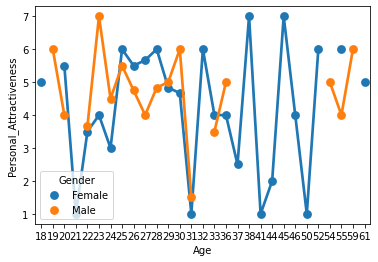

In [79]:
abc = data.groupby(['Age','Gender'], as_index=False).mean()
ax = sns.pointplot(x='Age', y='Personal_Attractiveness', hue='Gender', data=abc)

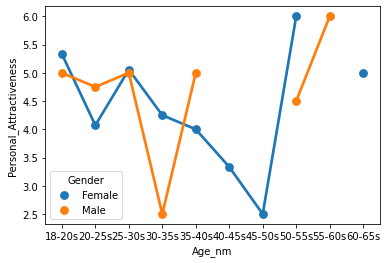

In [80]:
abc = data.groupby(['Age_nm','Gender'], as_index=False).mean()
ax = sns.pointplot(x='Age_nm', y='Personal_Attractiveness', hue='Gender', data=abc)

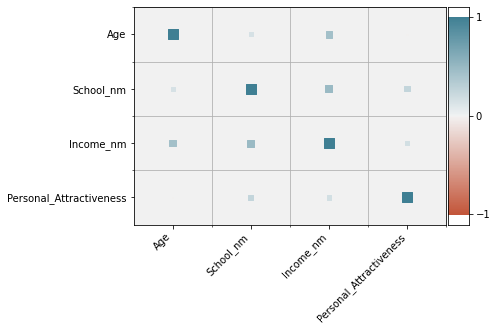

In [81]:
df_me_sin = data[['Age','School_nm','Income_nm','Personal_Attractiveness']]
corrplot(df_me_sin.corr(), size_scale=100, marker='s')  ## use in dataframe

## Personal_Intelligence

In [82]:
anova_test('Personal_Intelligence', 'Age', data)

  Source  ddof1  ddof2      F  p-unc    np2
0    Age     28     57  1.699  0.045  0.455


In [83]:
anova_test('Personal_Intelligence', 'Age_nm', data)

   Source  ddof1  ddof2      F  p-unc    np2
0  Age_nm      9     76  2.063  0.043  0.196


In [84]:
anova_test('Personal_Intelligence', 'School_nm', data)

      Source  ddof1  ddof2      F  p-unc    np2
0  School_nm      5     80  1.709  0.142  0.097


In [85]:
anova_test('Personal_Intelligence', 'Income_nm', data)

      Source  ddof1  ddof2      F  p-unc    np2
0  Income_nm      6     79  1.414   0.22  0.097


In [86]:
anova_test('Personal_Intelligence', 'Gender', data)

   Source  ddof1  ddof2      F  p-unc    np2
0  Gender      1     84  6.804  0.011  0.075


In [87]:
anova_test('Personal_Intelligence', 'Relationship', data)

         Source  ddof1  ddof2      F  p-unc    np2
0  Relationship      1     84  0.142  0.708  0.002


In [88]:
anova_test('Personal_Intelligence', ['Age','Gender'], data)

         Source        SS    DF       MS       F  p-unc    np2
0           Age  5243.621  28.0  187.272  61.393  0.000  0.976
1        Gender     6.559   1.0    6.559   2.150  0.150  0.048
2  Age * Gender   151.751  28.0    5.420   1.777  0.044  0.536
3      Residual   131.167  43.0    3.050     NaN    NaN    NaN


C:\Users\catar\anaconda3\envs\Ironhack\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 28, but rank is 15
  warnings.warn('covariance of constraints does not have full '


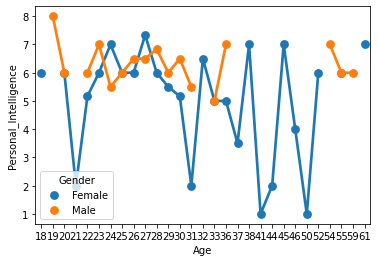

In [89]:
abc = data.groupby(['Age','Gender'], as_index=False).mean()
ax = sns.pointplot(x='Age', y='Personal_Intelligence', hue='Gender', data=abc)

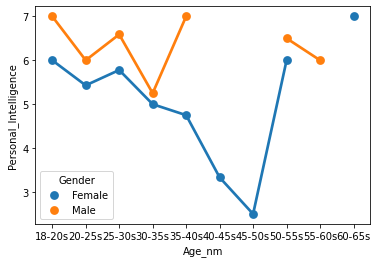

In [90]:
abc = data.groupby(['Age_nm','Gender'], as_index=False).mean()
ax = sns.pointplot(x='Age_nm', y='Personal_Intelligence', hue='Gender', data=abc)

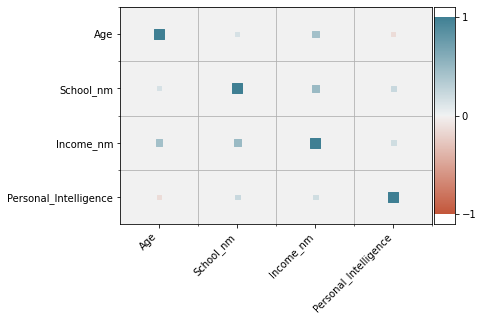

In [91]:
df_me_sin = data[['Age','School_nm','Income_nm','Personal_Intelligence']]
corrplot(df_me_sin.corr(), size_scale=100, marker='s')  ## use in dataframe

## Personal_Charisma

In [92]:
anova_test('Personal_Charisma', 'Age', data)

  Source  ddof1  ddof2      F  p-unc    np2
0    Age     28     57  1.747  0.038  0.462


In [93]:
anova_test('Personal_Charisma', 'Age_nm', data)

   Source  ddof1  ddof2      F  p-unc    np2
0  Age_nm      9     76  1.475  0.172  0.149


In [94]:
anova_test('Personal_Charisma', 'School_nm', data)

      Source  ddof1  ddof2     F  p-unc    np2
0  School_nm      5     80  1.72  0.139  0.097


In [95]:
anova_test('Personal_Charisma', 'Income_nm', data)

      Source  ddof1  ddof2      F  p-unc    np2
0  Income_nm      6     79  1.043  0.404  0.073


In [96]:
anova_test('Personal_Charisma', 'Gender', data)

   Source  ddof1  ddof2      F  p-unc    np2
0  Gender      1     84  5.871  0.018  0.065


In [97]:
anova_test('Personal_Charisma', 'Relationship', data)

         Source  ddof1  ddof2    F  p-unc  np2
0  Relationship      1     84  0.0  0.982  0.0


In [98]:
anova_test('Personal_Charisma', ['Age','Gender'], data)

         Source        SS    DF       MS       F  p-unc    np2
0           Age  4650.189  28.0  166.078  64.971  0.000  0.977
1        Gender     2.233   1.0    2.233   0.873  0.355  0.020
2  Age * Gender   145.911  28.0    5.211   2.039  0.017  0.570
3      Residual   109.917  43.0    2.556     NaN    NaN    NaN


C:\Users\catar\anaconda3\envs\Ironhack\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 28, but rank is 15
  warnings.warn('covariance of constraints does not have full '


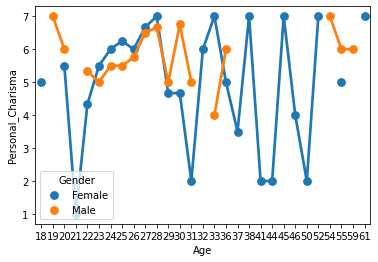

In [99]:
abc = data.groupby(['Age','Gender'], as_index=False).mean()
ax = sns.pointplot(x='Age', y='Personal_Charisma', hue='Gender', data=abc)

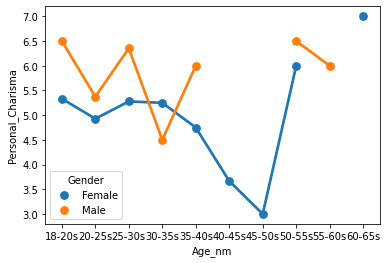

In [100]:
abc = data.groupby(['Age_nm','Gender'], as_index=False).mean()
ax = sns.pointplot(x='Age_nm', y='Personal_Charisma', hue='Gender', data=abc)

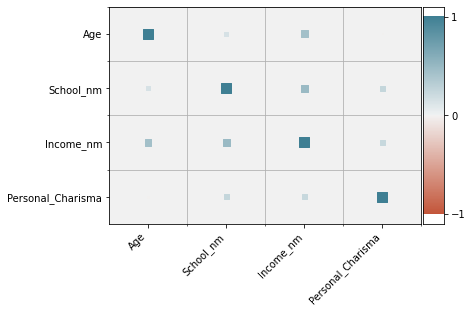

In [101]:
df_me_sin = data[['Age','School_nm','Income_nm','Personal_Charisma']]
corrplot(df_me_sin.corr(), size_scale=100, marker='s')  ## use in dataframe

## Personal_Spirituality

In [102]:
anova_test('Personal_Spirituality', 'Age', data)

  Source  ddof1  ddof2      F  p-unc    np2
0    Age     28     57  1.188  0.285  0.369


In [103]:
anova_test('Personal_Spirituality', 'Age_nm', data)

   Source  ddof1  ddof2      F  p-unc    np2
0  Age_nm      9     76  0.798  0.619  0.086


In [104]:
anova_test('Personal_Spirituality', 'School_nm', data)

      Source  ddof1  ddof2      F  p-unc    np2
0  School_nm      5     80  1.503  0.198  0.086


In [105]:
anova_test('Personal_Spirituality', 'Income_nm', data)

      Source  ddof1  ddof2      F  p-unc   np2
0  Income_nm      6     79  0.545  0.772  0.04


In [106]:
anova_test('Personal_Spirituality', 'Gender', data)

   Source  ddof1  ddof2      F  p-unc    np2
0  Gender      1     84  0.074  0.786  0.001


In [107]:
anova_test('Personal_Spirituality', 'Relationship', data)

         Source  ddof1  ddof2      F  p-unc    np2
0  Relationship      1     84  1.636  0.204  0.019


In [108]:
anova_test('Personal_Spirituality', ['Age','Gender'], data)

         Source        SS    DF       MS       F  p-unc    np2
0           Age  3125.691  28.0  111.632  18.427  0.000  0.923
1        Gender     1.363   1.0    1.363   0.225  0.638  0.005
2  Age * Gender   191.023  28.0    6.822   1.126  0.356  0.423
3      Residual   260.500  43.0    6.058     NaN    NaN    NaN


C:\Users\catar\anaconda3\envs\Ironhack\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 28, but rank is 15
  warnings.warn('covariance of constraints does not have full '


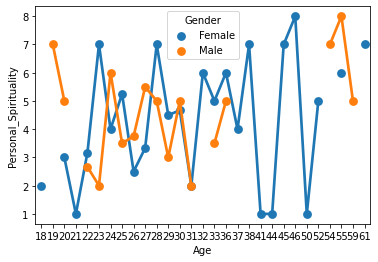

In [109]:
abc = data.groupby(['Age','Gender'], as_index=False).mean()
ax = sns.pointplot(x='Age', y='Personal_Spirituality', hue='Gender', data=abc)

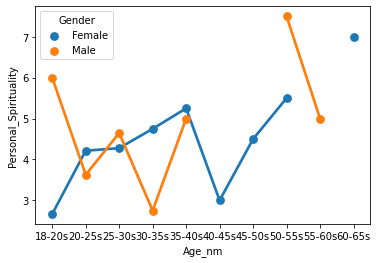

In [110]:
abc = data.groupby(['Age_nm','Gender'], as_index=False).mean()
ax = sns.pointplot(x='Age_nm', y='Personal_Spirituality', hue='Gender', data=abc)

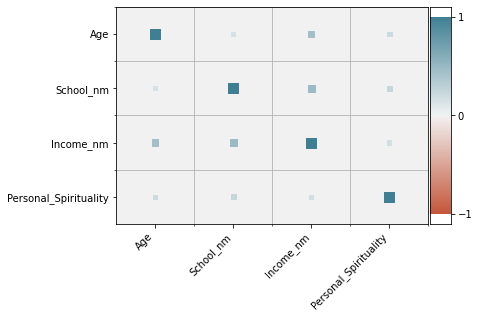

In [111]:
df_me_sin = data[['Age','School_nm','Income_nm','Personal_Spirituality']]
corrplot(df_me_sin.corr(), size_scale=100, marker='s')  ## use in dataframe

## Personal_Generosity

In [112]:
anova_test('Personal_Generosity', 'Age', data)

  Source  ddof1  ddof2      F  p-unc    np2
0    Age     28     57  1.332  0.178  0.396


In [113]:
anova_test('Personal_Generosity', 'Age_nm', data)

   Source  ddof1  ddof2      F  p-unc    np2
0  Age_nm      9     76  1.131  0.352  0.118


In [114]:
anova_test('Personal_Generosity', 'School_nm', data)

      Source  ddof1  ddof2      F  p-unc    np2
0  School_nm      5     80  1.566  0.179  0.089


In [115]:
anova_test('Personal_Generosity', 'Income_nm', data)

      Source  ddof1  ddof2      F  p-unc    np2
0  Income_nm      6     79  0.565  0.757  0.041


In [116]:
anova_test('Personal_Generosity', 'Gender', data)

   Source  ddof1  ddof2     F  p-unc    np2
0  Gender      1     84  0.11   0.74  0.001


In [117]:
anova_test('Personal_Generosity', 'Relationship', data)

         Source  ddof1  ddof2    F  p-unc  np2
0  Relationship      1     84  0.0   0.99  0.0


In [118]:
anova_test('Personal_Generosity', ['Age','Gender'], data)

         Source        SS    DF       MS       F  p-unc    np2
0           Age  6243.709  28.0  222.990  65.600  0.000  0.977
1        Gender     0.521   1.0    0.521   0.153  0.697  0.004
2  Age * Gender   214.989  28.0    7.678   2.259  0.008  0.595
3      Residual   146.167  43.0    3.399     NaN    NaN    NaN


C:\Users\catar\anaconda3\envs\Ironhack\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 28, but rank is 15
  warnings.warn('covariance of constraints does not have full '


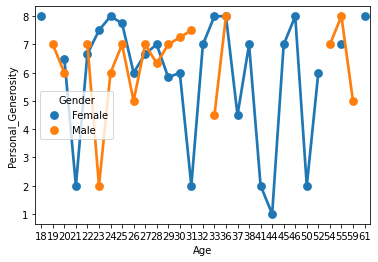

In [119]:
abc = data.groupby(['Age','Gender'], as_index=False).mean()
ax = sns.pointplot(x='Age', y='Personal_Generosity', hue='Gender', data=abc)

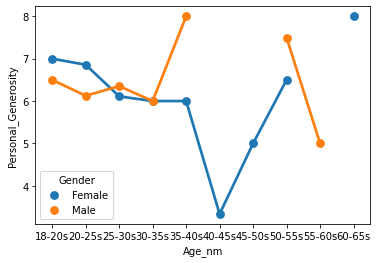

In [120]:
abc = data.groupby(['Age_nm','Gender'], as_index=False).mean()
ax = sns.pointplot(x='Age_nm', y='Personal_Generosity', hue='Gender', data=abc)

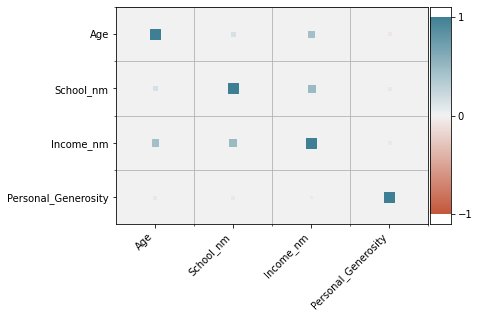

In [121]:
df_me_sin = data[['Age','School_nm','Income_nm','Personal_Generosity']]
corrplot(df_me_sin.corr(), size_scale=100, marker='s')  ## use in dataframe

## Personal_Kindness

In [122]:
anova_test('Personal_Kindness', 'Age', data)

  Source  ddof1  ddof2      F  p-unc    np2
0    Age     28     57  1.275  0.216  0.385


In [123]:
anova_test('Personal_Kindness', 'Age_nm', data)

   Source  ddof1  ddof2     F  p-unc   np2
0  Age_nm      9     76  1.15   0.34  0.12


In [124]:
anova_test('Personal_Kindness', 'School_nm', data)

      Source  ddof1  ddof2      F  p-unc    np2
0  School_nm      5     80  1.339  0.256  0.077


In [125]:
anova_test('Personal_Kindness', 'Income_nm', data)

      Source  ddof1  ddof2      F  p-unc    np2
0  Income_nm      6     79  1.045  0.403  0.074


In [126]:
anova_test('Personal_Kindness', 'Gender', data)

   Source  ddof1  ddof2      F  p-unc    np2
0  Gender      1     84  0.135  0.715  0.002


In [127]:
anova_test('Personal_Kindness', 'Relationship', data)

         Source  ddof1  ddof2      F  p-unc    np2
0  Relationship      1     84  0.086   0.77  0.001


In [128]:
anova_test('Personal_Kindness', ['Age','Gender'], data)

         Source        SS    DF       MS       F  p-unc    np2
0           Age  6331.941  28.0  226.141  61.545  0.000  0.976
1        Gender     0.423   1.0    0.423   0.115  0.736  0.003
2  Age * Gender   217.889  28.0    7.782   2.118  0.013  0.580
3      Residual   158.000  43.0    3.674     NaN    NaN    NaN


C:\Users\catar\anaconda3\envs\Ironhack\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 28, but rank is 15
  warnings.warn('covariance of constraints does not have full '


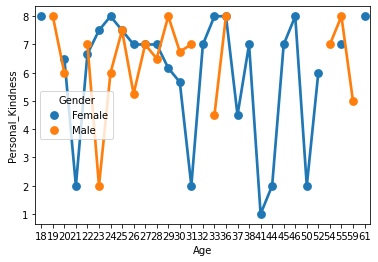

In [129]:
abc = data.groupby(['Age','Gender'], as_index=False).mean()
ax = sns.pointplot(x='Age', y='Personal_Kindness', hue='Gender', data=abc)

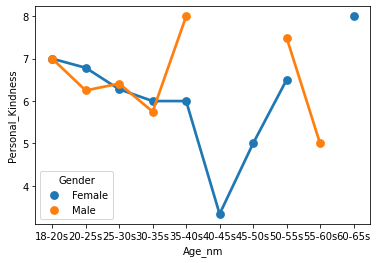

In [130]:
abc = data.groupby(['Age_nm','Gender'], as_index=False).mean()
ax = sns.pointplot(x='Age_nm', y='Personal_Kindness', hue='Gender', data=abc)

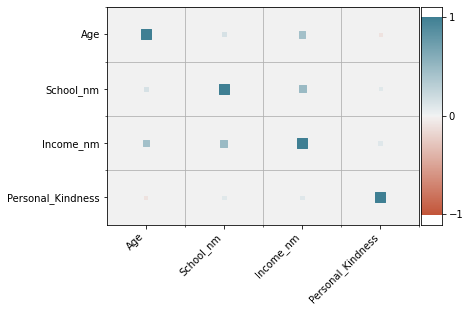

In [131]:
df_me_sin = data[['Age','School_nm','Income_nm','Personal_Kindness']]
corrplot(df_me_sin.corr(), size_scale=100, marker='s')  ## use in dataframe

## Personal_Adventurous

In [132]:
anova_test('Personal_Adventurous', 'Age', data)

  Source  ddof1  ddof2      F  p-unc    np2
0    Age     28     57  1.558  0.078  0.434


In [133]:
anova_test('Personal_Adventurous', 'Age_nm', data)

   Source  ddof1  ddof2      F  p-unc    np2
0  Age_nm      9     76  1.564  0.142  0.156


In [134]:
anova_test('Personal_Adventurous', 'School_nm', data)

      Source  ddof1  ddof2      F  p-unc    np2
0  School_nm      5     80  0.906  0.482  0.054


In [135]:
anova_test('Personal_Adventurous', 'Income_nm', data)

      Source  ddof1  ddof2      F  p-unc    np2
0  Income_nm      6     79  1.007  0.427  0.071


In [136]:
anova_test('Personal_Adventurous', 'Gender', data)

   Source  ddof1  ddof2     F  p-unc    np2
0  Gender      1     84  4.12  0.046  0.047


In [137]:
anova_test('Personal_Adventurous', 'Relationship', data)

         Source  ddof1  ddof2      F  p-unc   np2
0  Relationship      1     84  0.833  0.364  0.01


In [138]:
anova_test('Personal_Adventurous', ['Age','Gender'], data)

         Source        SS    DF       MS       F  p-unc    np2
0           Age  4638.184  28.0  165.649  48.483  0.000  0.969
1        Gender     5.723   1.0    5.723   1.675  0.202  0.037
2  Age * Gender   159.342  28.0    5.691   1.666  0.064  0.520
3      Residual   146.917  43.0    3.417     NaN    NaN    NaN


C:\Users\catar\anaconda3\envs\Ironhack\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 28, but rank is 15
  warnings.warn('covariance of constraints does not have full '


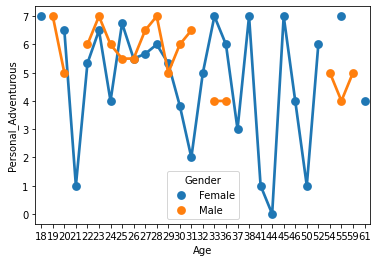

In [139]:
abc = data.groupby(['Age','Gender'], as_index=False).mean()
ax = sns.pointplot(x='Age', y='Personal_Adventurous', hue='Gender', data=abc)

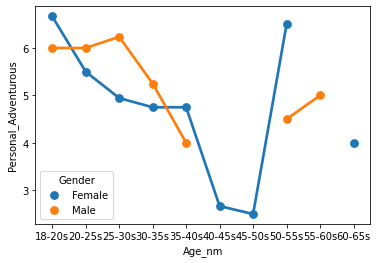

In [140]:
abc = data.groupby(['Age_nm','Gender'], as_index=False).mean()
ax = sns.pointplot(x='Age_nm', y='Personal_Adventurous', hue='Gender', data=abc)

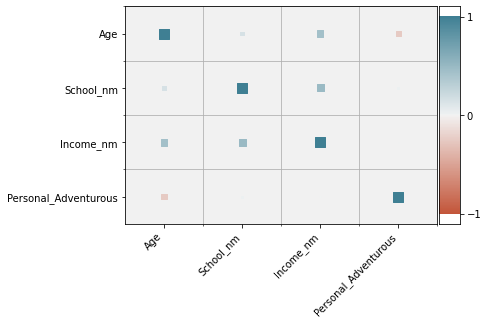

In [141]:
df_me_sin = data[['Age','School_nm','Income_nm','Personal_Adventurous']]
corrplot(df_me_sin.corr(), size_scale=100, marker='s')  ## use in dataframe

##  Personal_Fun

In [142]:
anova_test('Personal_Fun', 'Age', data)

  Source  ddof1  ddof2      F  p-unc    np2
0    Age     28     57  1.672   0.05  0.451


In [143]:
anova_test('Personal_Fun', 'Age_nm', data)

   Source  ddof1  ddof2      F  p-unc    np2
0  Age_nm      9     76  1.651  0.116  0.163


In [144]:
anova_test('Personal_Fun', 'School_nm', data)

      Source  ddof1  ddof2      F  p-unc    np2
0  School_nm      5     80  1.281   0.28  0.074


In [145]:
anova_test('Personal_Fun', 'Income_nm', data)

      Source  ddof1  ddof2      F  p-unc    np2
0  Income_nm      6     79  0.939  0.472  0.067


In [146]:
anova_test('Personal_Fun', 'Gender', data)

   Source  ddof1  ddof2      F  p-unc    np2
0  Gender      1     84  4.067  0.047  0.046


In [147]:
anova_test('Personal_Fun', 'Relationship', data)

         Source  ddof1  ddof2      F  p-unc  np2
0  Relationship      1     84  0.006  0.937  0.0


In [148]:
anova_test('Personal_Fun', ['Age','Gender'], data)

         Source        SS    DF       MS       F  p-unc    np2
0           Age  5591.718  28.0  199.704  72.825  0.000  0.979
1        Gender     5.774   1.0    5.774   2.105  0.154  0.047
2  Age * Gender   177.520  28.0    6.340   2.312  0.006  0.601
3      Residual   117.917  43.0    2.742     NaN    NaN    NaN


C:\Users\catar\anaconda3\envs\Ironhack\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 28, but rank is 15
  warnings.warn('covariance of constraints does not have full '


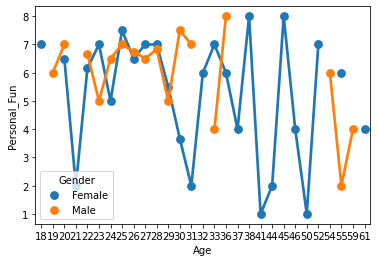

In [149]:
abc = data.groupby(['Age','Gender'], as_index=False).mean()
ax = sns.pointplot(x='Age', y='Personal_Fun', hue='Gender', data=abc)

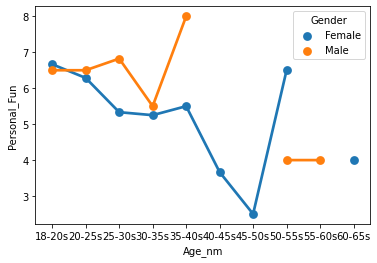

In [150]:
abc = data.groupby(['Age_nm','Gender'], as_index=False).mean()
ax = sns.pointplot(x='Age_nm', y='Personal_Fun', hue='Gender', data=abc)

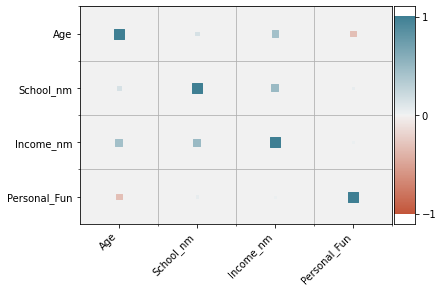

In [151]:
df_me_sin = data[['Age','School_nm','Income_nm','Personal_Fun']]
corrplot(df_me_sin.corr(), size_scale=100, marker='s')  ## use in dataframe

## Personal_Energetic

In [152]:
anova_test('Personal_Energetic', 'Age', data)

  Source  ddof1  ddof2      F  p-unc    np2
0    Age     28     57  1.569  0.075  0.435


In [153]:
anova_test('Personal_Energetic', 'Age_nm', data)

   Source  ddof1  ddof2      F  p-unc    np2
0  Age_nm      9     76  1.387  0.209  0.141


In [154]:
anova_test('Personal_Energetic', 'School_nm', data)

      Source  ddof1  ddof2      F  p-unc    np2
0  School_nm      5     80  1.593  0.172  0.091


In [155]:
anova_test('Personal_Energetic', 'Income_nm', data)

      Source  ddof1  ddof2      F  p-unc    np2
0  Income_nm      6     79  1.544  0.175  0.105


In [156]:
anova_test('Personal_Energetic', 'Gender', data)

   Source  ddof1  ddof2      F  p-unc    np2
0  Gender      1     84  2.713  0.103  0.031


In [157]:
anova_test('Personal_Energetic', 'Relationship', data)

         Source  ddof1  ddof2      F  p-unc    np2
0  Relationship      1     84  0.218  0.642  0.003


In [158]:
anova_test('Personal_Energetic', ['Age','Gender'], data)

         Source        SS    DF       MS       F  p-unc    np2
0           Age  4965.784  28.0  177.349  78.350  0.000  0.981
1        Gender     2.208   1.0    2.208   0.975  0.329  0.022
2  Age * Gender   178.425  28.0    6.372   2.815  0.001  0.647
3      Residual    97.333  43.0    2.264     NaN    NaN    NaN


C:\Users\catar\anaconda3\envs\Ironhack\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 28, but rank is 15
  warnings.warn('covariance of constraints does not have full '


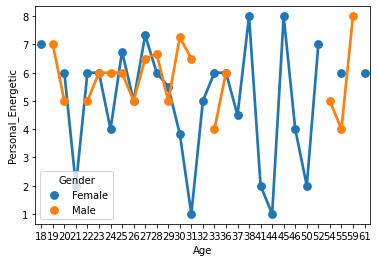

In [159]:
abc = data.groupby(['Age','Gender'], as_index=False).mean()
ax = sns.pointplot(x='Age', y='Personal_Energetic', hue='Gender', data=abc)

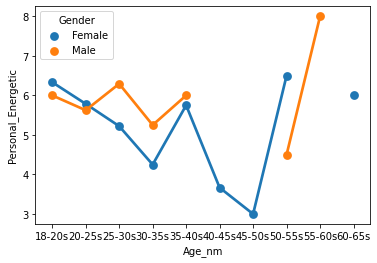

In [160]:
abc = data.groupby(['Age_nm','Gender'], as_index=False).mean()
ax = sns.pointplot(x='Age_nm', y='Personal_Energetic', hue='Gender', data=abc)

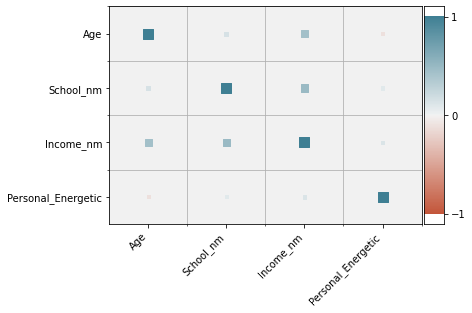

In [161]:
df_me_sin = data[['Age','School_nm','Income_nm','Personal_Energetic']]
corrplot(df_me_sin.corr(), size_scale=100, marker='s')  ## use in dataframe

## Extra

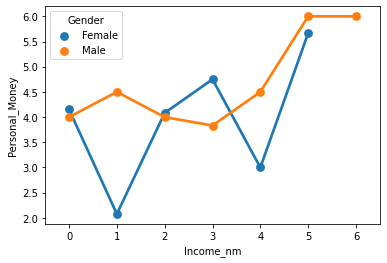

In [162]:
abc = data.groupby(['Income_nm','Gender'], as_index=False).mean()
ax = sns.pointplot(x='Income_nm', y='Personal_Money', hue='Gender', data=abc)

# Single - Future Partner
## Future_Partner_Sincerity

In [163]:
anova_test('Future_Partner_Sincerity', 'Age', data)

  Source  ddof1  ddof2      F  p-unc    np2
0    Age     12      3  16.25  0.021  0.985


In [164]:
anova_test('Future_Partner_Sincerity', 'Age_nm', data)

   Source  ddof1  ddof2      F  p-unc    np2
0  Age_nm      4     11  3.329  0.051  0.548


In [165]:
anova_test('Future_Partner_Sincerity', 'School_nm', data)

      Source  ddof1  ddof2      F  p-unc    np2
0  School_nm      2     13  2.563  0.115  0.283


In [166]:
anova_test('Future_Partner_Sincerity', 'Income_nm', data)

      Source  ddof1  ddof2      F  p-unc    np2
0  Income_nm      5     10  0.491  0.777  0.197


In [167]:
anova_test('Future_Partner_Sincerity', 'Gender', data)

   Source  ddof1  ddof2      F  p-unc   np2
0  Gender      1     14  0.438  0.519  0.03


In [168]:
anova_test('Future_Partner_Sincerity', 'Relationship', data)

         Source  ddof1  ddof2  np2
0  Relationship      0     15  0.0


In [169]:
anova_test('Future_Partner_Sincerity', ['Age','Gender'], data)

         Source        SS    DF       MS        F  p-unc    np2
0           Age  3138.794  12.0  261.566  523.132  0.032  1.000
1        Gender     3.448   1.0    3.448    6.897  0.232  0.873
2  Age * Gender    88.802  12.0    7.400   14.800  0.201  0.994
3      Residual     0.500   1.0    0.500      NaN    NaN    NaN


C:\Users\catar\anaconda3\envs\Ironhack\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 12, but rank is 3
  warnings.warn('covariance of constraints does not have full '


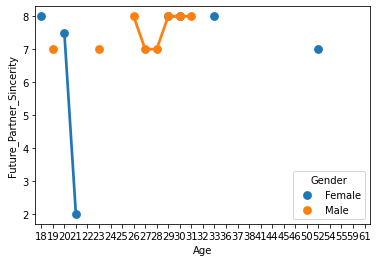

In [170]:
abc = data.groupby(['Age','Gender'], as_index=False).mean()
ax = sns.pointplot(x='Age', y='Future_Partner_Sincerity', hue='Gender', data=abc)

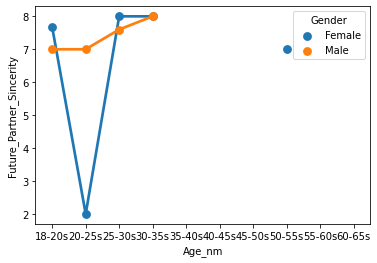

In [171]:
abc = data.groupby(['Age_nm','Gender'], as_index=False).mean()
ax = sns.pointplot(x='Age_nm', y='Future_Partner_Sincerity', hue='Gender', data=abc)

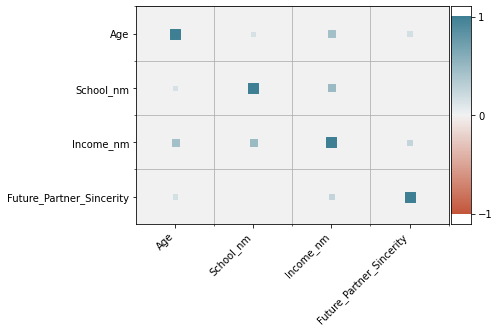

In [172]:
df_me_sin = data[['Age','School_nm','Income_nm','Future_Partner_Sincerity']]
corrplot(df_me_sin.corr(), size_scale=100, marker='s')  ## use in dataframe

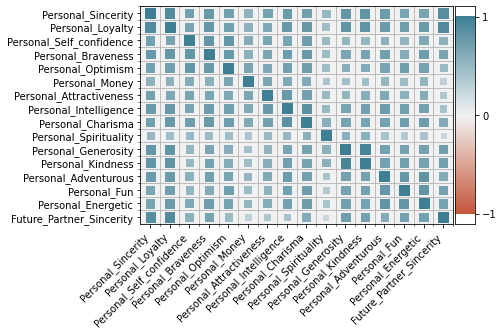

In [173]:
df_me_sin = data[['Personal_Sincerity','Personal_Loyalty','Personal_Self_confidence','Personal_Braveness','Personal_Optimism','Personal_Money','Personal_Attractiveness','Personal_Intelligence','Personal_Charisma','Personal_Spirituality','Personal_Generosity','Personal_Kindness','Personal_Adventurous','Personal_Fun','Personal_Energetic','Future_Partner_Sincerity']]
corrplot(df_me_sin.corr(), size_scale=100, marker='s')  ## use in dataframe

## Future_Partner_Loyalty

In [174]:
anova_test('Future_Partner_Loyalty', 'Age', data)

  Source  ddof1  ddof2    F  p-unc  np2
0    Age     12      3  inf    0.0  1.0


In [175]:
anova_test('Future_Partner_Loyalty', 'Age_nm', data)

   Source  ddof1  ddof2      F  p-unc    np2
0  Age_nm      4     11  6.944  0.005  0.716


In [176]:
anova_test('Future_Partner_Loyalty', 'School_nm', data)

      Source  ddof1  ddof2      F  p-unc    np2
0  School_nm      2     13  2.373  0.132  0.267


In [177]:
anova_test('Future_Partner_Loyalty', 'Income_nm', data)

      Source  ddof1  ddof2     F  p-unc    np2
0  Income_nm      5     10  0.27  0.919  0.119


In [178]:
anova_test('Future_Partner_Loyalty', 'Gender', data)

   Source  ddof1  ddof2      F  p-unc    np2
0  Gender      1     14  0.101  0.756  0.007


In [179]:
anova_test('Future_Partner_Loyalty', 'Relationship', data)

         Source  ddof1  ddof2  np2
0  Relationship      0     15  0.0


In [180]:
anova_test('Future_Partner_Loyalty', ['Age','Gender'], data)

         Source        SS    DF       MS             F  p-unc  np2
0           Age  3146.710  12.0  262.226  5.413856e+29    0.0  1.0
1        Gender     5.427   1.0    5.427  1.120549e+28    0.0  1.0
2  Age * Gender    89.323  12.0    7.444  1.536777e+28    0.0  1.0
3      Residual     0.000   1.0    0.000           NaN    NaN  NaN


C:\Users\catar\anaconda3\envs\Ironhack\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 12, but rank is 3
  warnings.warn('covariance of constraints does not have full '


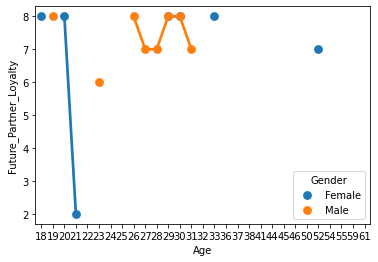

In [181]:
abc = data.groupby(['Age','Gender'], as_index=False).mean()
ax = sns.pointplot(x='Age', y='Future_Partner_Loyalty', hue='Gender', data=abc)

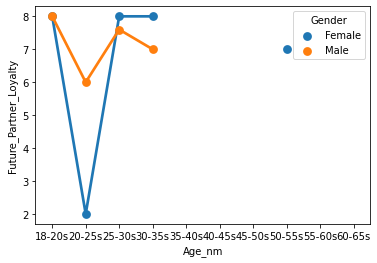

In [182]:
abc = data.groupby(['Age_nm','Gender'], as_index=False).mean()
ax = sns.pointplot(x='Age_nm', y='Future_Partner_Loyalty', hue='Gender', data=abc)

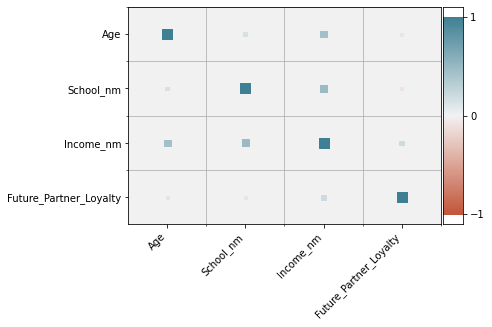

In [183]:
df_me_sin = data[['Age','School_nm','Income_nm','Future_Partner_Loyalty']]
corrplot(df_me_sin.corr(), size_scale=100, marker='s')  ## use in dataframe

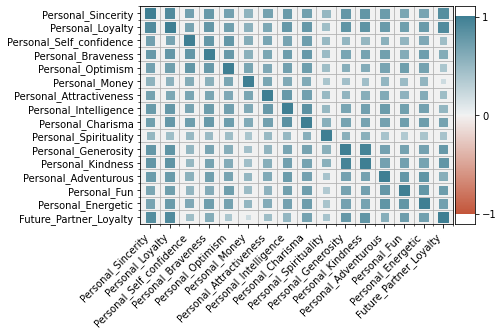

In [184]:
df_me_sin = data[['Personal_Sincerity','Personal_Loyalty','Personal_Self_confidence','Personal_Braveness','Personal_Optimism','Personal_Money','Personal_Attractiveness','Personal_Intelligence','Personal_Charisma','Personal_Spirituality','Personal_Generosity','Personal_Kindness','Personal_Adventurous','Personal_Fun','Personal_Energetic','Future_Partner_Loyalty']]
corrplot(df_me_sin.corr(), size_scale=100, marker='s')  ## use in dataframe

## Future_Partner_Self_confidence

In [185]:
anova_test('Future_Partner_Self_confidence', 'Age', data)

  Source  ddof1  ddof2     F  p-unc    np2
0    Age     12      3  3.65  0.157  0.936


In [186]:
anova_test('Future_Partner_Self_confidence', 'Age_nm', data)

   Source  ddof1  ddof2      F  p-unc    np2
0  Age_nm      4     11  2.392  0.114  0.465


In [187]:
anova_test('Future_Partner_Self_confidence', 'School_nm', data)

      Source  ddof1  ddof2      F  p-unc    np2
0  School_nm      2     13  2.977  0.086  0.314


In [188]:
anova_test('Future_Partner_Self_confidence', 'Income_nm', data)

      Source  ddof1  ddof2    F  p-unc    np2
0  Income_nm      5     10  0.4  0.838  0.167


In [189]:
anova_test('Future_Partner_Self_confidence', 'Gender', data)

   Source  ddof1  ddof2     F  p-unc    np2
0  Gender      1     14  0.09  0.768  0.006


In [190]:
anova_test('Future_Partner_Self_confidence', 'Relationship', data)

         Source  ddof1  ddof2  np2
0  Relationship      0     15  0.0


In [191]:
anova_test('Future_Partner_Self_confidence', ['Age','Gender'], data)

         Source        SS    DF       MS       F  p-unc    np2
0           Age  1926.393  12.0  160.533  80.266  0.082  0.999
1        Gender     4.036   1.0    4.036   2.018  0.390  0.669
2  Age * Gender    84.402  12.0    7.033   3.517  0.396  0.977
3      Residual     2.000   1.0    2.000     NaN    NaN    NaN


C:\Users\catar\anaconda3\envs\Ironhack\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 12, but rank is 3
  warnings.warn('covariance of constraints does not have full '


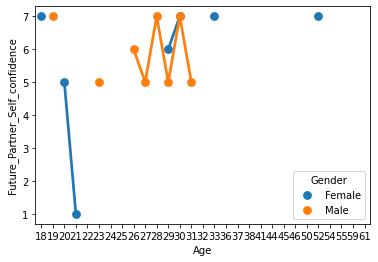

In [192]:
abc = data.groupby(['Age','Gender'], as_index=False).mean()
ax = sns.pointplot(x='Age', y='Future_Partner_Self_confidence', hue='Gender', data=abc)

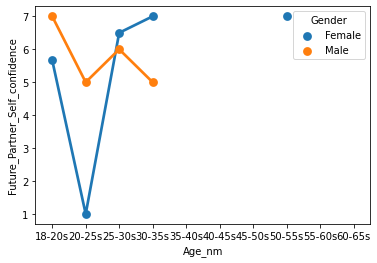

In [193]:
abc = data.groupby(['Age_nm','Gender'], as_index=False).mean()
ax = sns.pointplot(x='Age_nm', y='Future_Partner_Self_confidence', hue='Gender', data=abc)

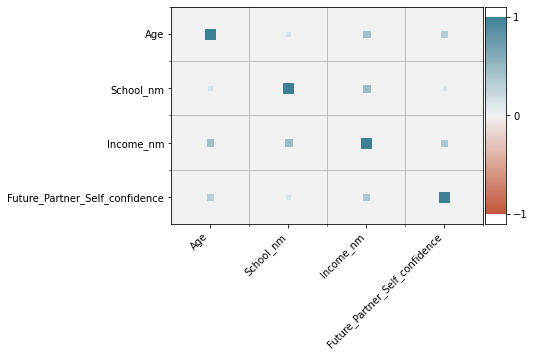

In [194]:
df_me_sin = data[['Age','School_nm','Income_nm','Future_Partner_Self_confidence']]
corrplot(df_me_sin.corr(), size_scale=100, marker='s')  ## use in dataframe

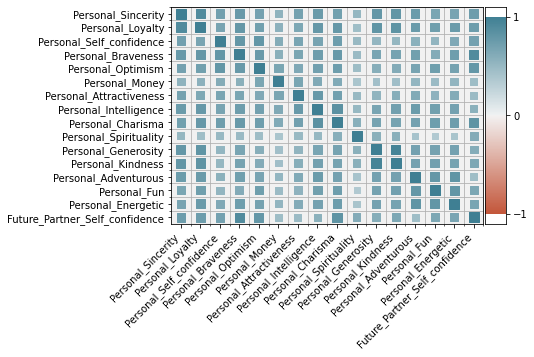

In [195]:
df_me_sin = data[['Personal_Sincerity','Personal_Loyalty','Personal_Self_confidence','Personal_Braveness','Personal_Optimism','Personal_Money','Personal_Attractiveness','Personal_Intelligence','Personal_Charisma','Personal_Spirituality','Personal_Generosity','Personal_Kindness','Personal_Adventurous','Personal_Fun','Personal_Energetic','Future_Partner_Self_confidence']]
corrplot(df_me_sin.corr(), size_scale=100, marker='s')  ## use in dataframe

## Future_Partner_Braveness

In [196]:
anova_test('Future_Partner_Braveness', 'Age', data)

  Source  ddof1  ddof2       F  p-unc    np2
0    Age     12      3  17.625  0.019  0.986


In [197]:
anova_test('Future_Partner_Braveness', 'Age_nm', data)

   Source  ddof1  ddof2      F  p-unc    np2
0  Age_nm      4     11  3.327  0.051  0.547


In [198]:
anova_test('Future_Partner_Braveness', 'School_nm', data)

      Source  ddof1  ddof2      F  p-unc    np2
0  School_nm      2     13  2.214  0.149  0.254


In [199]:
anova_test('Future_Partner_Braveness', 'Income_nm', data)

      Source  ddof1  ddof2      F  p-unc    np2
0  Income_nm      5     10  0.509  0.764  0.203


In [200]:
anova_test('Future_Partner_Braveness', 'Gender', data)

   Source  ddof1  ddof2    F  p-unc  np2
0  Gender      1     14  0.0    1.0  0.0


In [201]:
anova_test('Future_Partner_Braveness', 'Relationship', data)

         Source  ddof1  ddof2  np2
0  Relationship      0     15  0.0


In [202]:
anova_test('Future_Partner_Braveness', ['Age','Gender'], data)

         Source        SS    DF       MS             F  p-unc  np2
0           Age  2055.458  12.0  171.288  4.094927e+29    0.0  1.0
1        Gender     6.602   1.0    6.602  1.578300e+28    0.0  1.0
2  Age * Gender    74.136  12.0    6.178  1.476945e+28    0.0  1.0
3      Residual     0.000   1.0    0.000           NaN    NaN  NaN


C:\Users\catar\anaconda3\envs\Ironhack\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 12, but rank is 3
  warnings.warn('covariance of constraints does not have full '


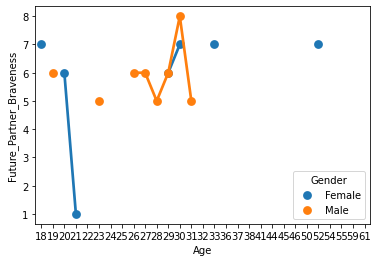

In [203]:
abc = data.groupby(['Age','Gender'], as_index=False).mean()
ax = sns.pointplot(x='Age', y='Future_Partner_Braveness', hue='Gender', data=abc)

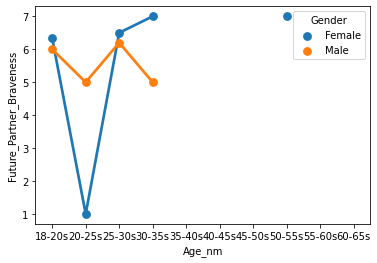

In [204]:
abc = data.groupby(['Age_nm','Gender'], as_index=False).mean()
ax = sns.pointplot(x='Age_nm', y='Future_Partner_Braveness', hue='Gender', data=abc)

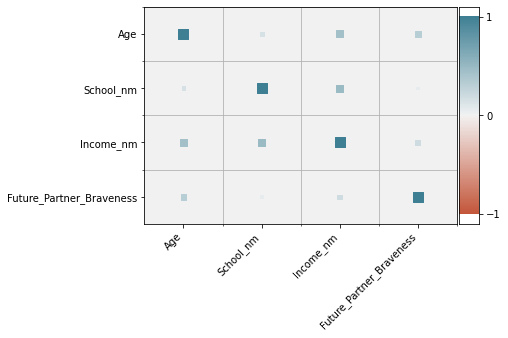

In [205]:
df_me_sin = data[['Age','School_nm','Income_nm','Future_Partner_Braveness']]
corrplot(df_me_sin.corr(), size_scale=100, marker='s')  ## use in dataframe

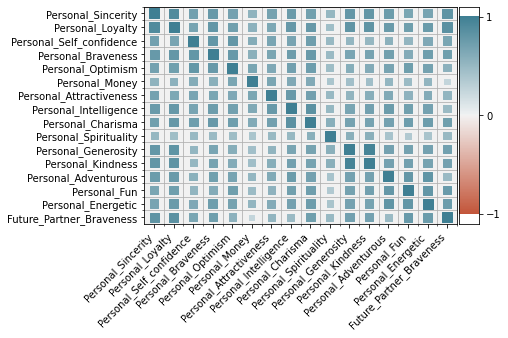

In [206]:
df_me_sin = data[['Personal_Sincerity','Personal_Loyalty','Personal_Self_confidence','Personal_Braveness','Personal_Optimism','Personal_Money','Personal_Attractiveness','Personal_Intelligence','Personal_Charisma','Personal_Spirituality','Personal_Generosity','Personal_Kindness','Personal_Adventurous','Personal_Fun','Personal_Energetic','Future_Partner_Braveness']]
corrplot(df_me_sin.corr(), size_scale=100, marker='s')  ## use in dataframe

## Future_Partner_Optimism

In [207]:
anova_test('Future_Partner_Optimism', 'Age', data)

  Source  ddof1  ddof2      F  p-unc    np2
0    Age     12      3  5.708  0.089  0.958


In [208]:
anova_test('Future_Partner_Optimism', 'Age_nm', data)

   Source  ddof1  ddof2      F  p-unc    np2
0  Age_nm      4     11  2.891  0.073  0.512


In [209]:
anova_test('Future_Partner_Optimism', 'School_nm', data)

      Source  ddof1  ddof2      F  p-unc    np2
0  School_nm      2     13  2.214  0.149  0.254


In [210]:
anova_test('Future_Partner_Optimism', 'Income_nm', data)

      Source  ddof1  ddof2      F  p-unc    np2
0  Income_nm      5     10  0.466  0.794  0.189


In [211]:
anova_test('Future_Partner_Optimism', 'Gender', data)

   Source  ddof1  ddof2    F  p-unc  np2
0  Gender      1     14  0.0    1.0  0.0


In [212]:
anova_test('Future_Partner_Optimism', 'Relationship', data)

         Source  ddof1  ddof2  np2
0  Relationship      0     15  0.0


In [213]:
anova_test('Future_Partner_Optimism', ['Age','Gender'], data)

         Source        SS    DF       MS        F  p-unc    np2
0           Age  2236.036  12.0  186.336  372.673  0.038  1.000
1        Gender     6.759   1.0    6.759   13.518  0.169  0.931
2  Age * Gender    76.491  12.0    6.374   12.748  0.216  0.994
3      Residual     0.500   1.0    0.500      NaN    NaN    NaN


C:\Users\catar\anaconda3\envs\Ironhack\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 12, but rank is 3
  warnings.warn('covariance of constraints does not have full '


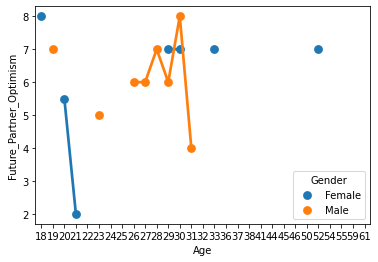

In [214]:
abc = data.groupby(['Age','Gender'], as_index=False).mean()
ax = sns.pointplot(x='Age', y='Future_Partner_Optimism', hue='Gender', data=abc)

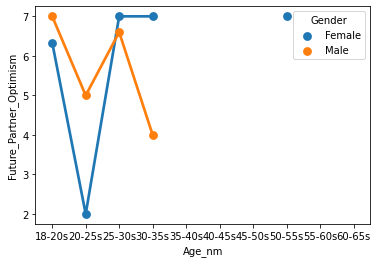

In [215]:
abc = data.groupby(['Age_nm','Gender'], as_index=False).mean()
ax = sns.pointplot(x='Age_nm', y='Future_Partner_Optimism', hue='Gender', data=abc)

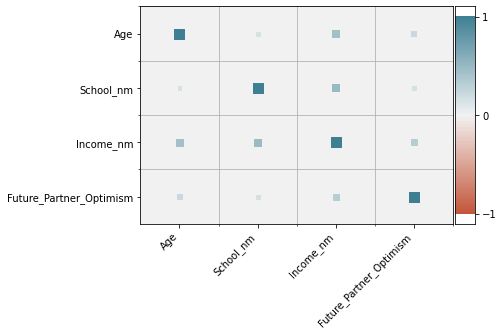

In [216]:
df_me_sin = data[['Age','School_nm','Income_nm','Future_Partner_Optimism']]
corrplot(df_me_sin.corr(), size_scale=100, marker='s')  ## use in dataframe

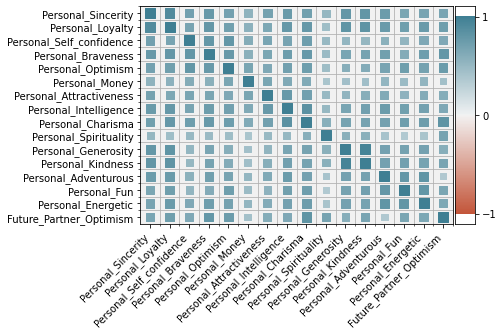

In [217]:
df_me_sin = data[['Personal_Sincerity','Personal_Loyalty','Personal_Self_confidence','Personal_Braveness','Personal_Optimism','Personal_Money','Personal_Attractiveness','Personal_Intelligence','Personal_Charisma','Personal_Spirituality','Personal_Generosity','Personal_Kindness','Personal_Adventurous','Personal_Fun','Personal_Energetic','Future_Partner_Optimism']]
corrplot(df_me_sin.corr(), size_scale=100, marker='s')  ## use in dataframe

## Future_Partner_Money

In [218]:
anova_test('Future_Partner_Money', 'Age', data)

  Source  ddof1  ddof2      F  p-unc    np2
0    Age     12      3  0.639  0.751  0.719


In [219]:
anova_test('Future_Partner_Money', 'Age_nm', data)

   Source  ddof1  ddof2      F  p-unc    np2
0  Age_nm      4     11  2.355  0.118  0.461


In [220]:
anova_test('Future_Partner_Money', 'School_nm', data)

      Source  ddof1  ddof2     F  p-unc    np2
0  School_nm      2     13  1.56  0.247  0.194


In [221]:
anova_test('Future_Partner_Money', 'Income_nm', data)

      Source  ddof1  ddof2      F  p-unc    np2
0  Income_nm      5     10  1.165   0.39  0.368


In [222]:
anova_test('Future_Partner_Money', 'Gender', data)

   Source  ddof1  ddof2      F  p-unc    np2
0  Gender      1     14  0.336  0.571  0.023


In [223]:
anova_test('Future_Partner_Money', 'Relationship', data)

         Source  ddof1  ddof2  np2
0  Relationship      0     15  0.0


In [224]:
anova_test('Future_Partner_Money', ['Age','Gender'], data)

         Source       SS    DF      MS      F  p-unc    np2
0           Age  664.815  12.0  55.401  4.432  0.333  0.982
1        Gender    0.341   1.0   0.341  0.027  0.896  0.027
2  Age * Gender  113.296  12.0   9.441  0.755  0.728  0.901
3      Residual   12.500   1.0  12.500    NaN    NaN    NaN


C:\Users\catar\anaconda3\envs\Ironhack\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 12, but rank is 3
  warnings.warn('covariance of constraints does not have full '


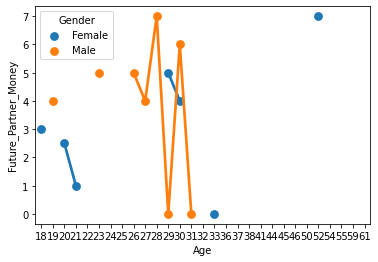

In [225]:
abc = data.groupby(['Age','Gender'], as_index=False).mean()
ax = sns.pointplot(x='Age', y='Future_Partner_Money', hue='Gender', data=abc)

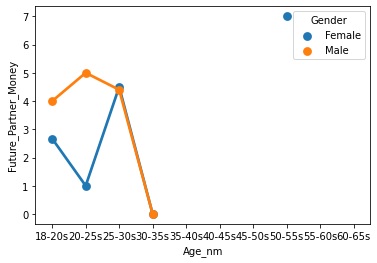

In [226]:
abc = data.groupby(['Age_nm','Gender'], as_index=False).mean()
ax = sns.pointplot(x='Age_nm', y='Future_Partner_Money', hue='Gender', data=abc)

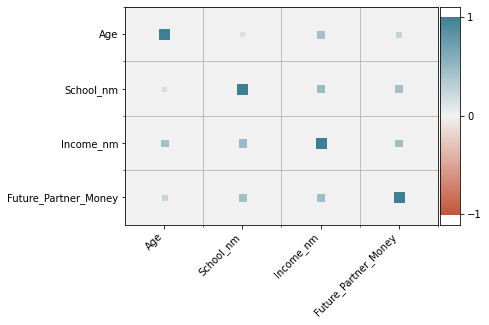

In [227]:
df_me_sin = data[['Age','School_nm','Income_nm','Future_Partner_Money']]
corrplot(df_me_sin.corr(), size_scale=100, marker='s')  ## use in dataframe

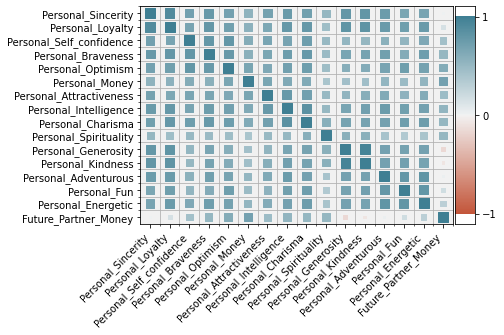

In [228]:
df_me_sin = data[['Personal_Sincerity','Personal_Loyalty','Personal_Self_confidence','Personal_Braveness','Personal_Optimism','Personal_Money','Personal_Attractiveness','Personal_Intelligence','Personal_Charisma','Personal_Spirituality','Personal_Generosity','Personal_Kindness','Personal_Adventurous','Personal_Fun','Personal_Energetic','Future_Partner_Money']]
corrplot(df_me_sin.corr(), size_scale=100, marker='s')  ## use in dataframe

## Future_Partner_Attractiveness

In [229]:
anova_test('Future_Partner_Attractiveness', 'Age', data)

  Source  ddof1  ddof2      F  p-unc    np2
0    Age     12      3  6.894  0.069  0.965


In [230]:
anova_test('Future_Partner_Attractiveness', 'Age_nm', data)

   Source  ddof1  ddof2     F  p-unc    np2
0  Age_nm      4     11  5.94  0.008  0.684


In [231]:
anova_test('Future_Partner_Attractiveness', 'School_nm', data)

      Source  ddof1  ddof2      F  p-unc    np2
0  School_nm      2     13  0.262  0.773  0.039


In [232]:
anova_test('Future_Partner_Attractiveness', 'Income_nm', data)

      Source  ddof1  ddof2      F  p-unc    np2
0  Income_nm      5     10  1.008  0.461  0.335


In [233]:
anova_test('Future_Partner_Attractiveness', 'Gender', data)

   Source  ddof1  ddof2      F  p-unc    np2
0  Gender      1     14  0.111  0.744  0.008


In [234]:
anova_test('Future_Partner_Attractiveness', 'Relationship', data)

         Source  ddof1  ddof2  np2
0  Relationship      0     15  0.0


In [235]:
anova_test('Future_Partner_Attractiveness', ['Age','Gender'], data)

         Source        SS    DF       MS        F  p-unc    np2
0           Age  1599.968  12.0  133.331  266.661  0.045  1.000
1        Gender     2.942   1.0    2.942    5.884  0.249  0.855
2  Age * Gender   122.508  12.0   10.209   20.418  0.171  0.996
3      Residual     0.500   1.0    0.500      NaN    NaN    NaN


C:\Users\catar\anaconda3\envs\Ironhack\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 12, but rank is 3
  warnings.warn('covariance of constraints does not have full '


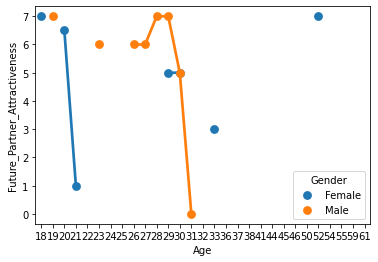

In [236]:
abc = data.groupby(['Age','Gender'], as_index=False).mean()
ax = sns.pointplot(x='Age', y='Future_Partner_Attractiveness', hue='Gender', data=abc)

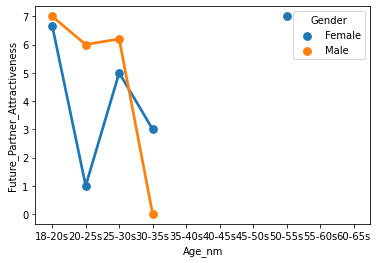

In [237]:
abc = data.groupby(['Age_nm','Gender'], as_index=False).mean()
ax = sns.pointplot(x='Age_nm', y='Future_Partner_Attractiveness', hue='Gender', data=abc)

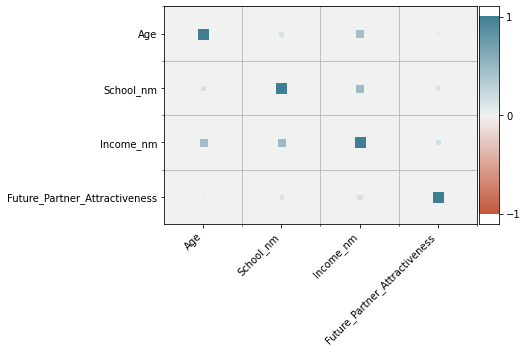

In [238]:
df_me_sin = data[['Age','School_nm','Income_nm','Future_Partner_Attractiveness']]
corrplot(df_me_sin.corr(), size_scale=100, marker='s')  ## use in dataframe

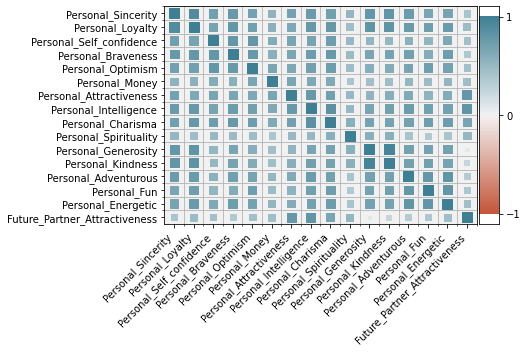

In [239]:
df_me_sin = data[['Personal_Sincerity','Personal_Loyalty','Personal_Self_confidence','Personal_Braveness','Personal_Optimism','Personal_Money','Personal_Attractiveness','Personal_Intelligence','Personal_Charisma','Personal_Spirituality','Personal_Generosity','Personal_Kindness','Personal_Adventurous','Personal_Fun','Personal_Energetic','Future_Partner_Attractiveness']]
corrplot(df_me_sin.corr(), size_scale=100, marker='s')  ## use in dataframe

## Future_Partner_Intelligence

In [240]:
anova_test('Future_Partner_Intelligence', 'Age', data)

  Source  ddof1  ddof2    F  p-unc  np2
0    Age     12      3  inf    0.0  1.0


In [241]:
anova_test('Future_Partner_Intelligence', 'Age_nm', data)

   Source  ddof1  ddof2      F  p-unc    np2
0  Age_nm      4     11  1.849   0.19  0.402


In [242]:
anova_test('Future_Partner_Intelligence', 'School_nm', data)

      Source  ddof1  ddof2      F  p-unc    np2
0  School_nm      2     13  3.245  0.072  0.333


In [243]:
anova_test('Future_Partner_Intelligence', 'Income_nm', data)

      Source  ddof1  ddof2      F  p-unc    np2
0  Income_nm      5     10  0.257  0.927  0.114


In [244]:
anova_test('Future_Partner_Intelligence', 'Gender', data)

   Source  ddof1  ddof2      F  p-unc    np2
0  Gender      1     14  0.197  0.664  0.014


In [245]:
anova_test('Future_Partner_Intelligence', 'Relationship', data)

         Source  ddof1  ddof2  np2
0  Relationship      0     15  0.0


In [246]:
anova_test('Future_Partner_Intelligence', ['Age','Gender'], data)

         Source        SS    DF       MS             F  p-unc  np2
0           Age  2261.602  12.0  188.467  6.474529e+29    0.0  1.0
1        Gender     3.601   1.0    3.601  1.236936e+28    0.0  1.0
2  Age * Gender    87.599  12.0    7.300  2.507801e+28    0.0  1.0
3      Residual     0.000   1.0    0.000           NaN    NaN  NaN


C:\Users\catar\anaconda3\envs\Ironhack\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 12, but rank is 3
  warnings.warn('covariance of constraints does not have full '


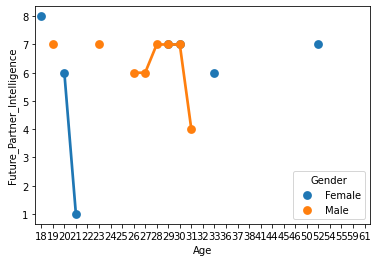

In [247]:
abc = data.groupby(['Age','Gender'], as_index=False).mean()
ax = sns.pointplot(x='Age', y='Future_Partner_Intelligence', hue='Gender', data=abc)

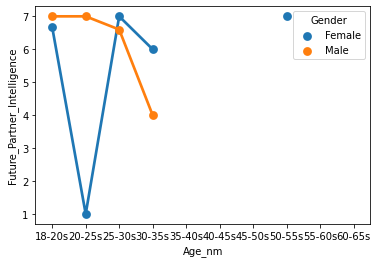

In [248]:
abc = data.groupby(['Age_nm','Gender'], as_index=False).mean()
ax = sns.pointplot(x='Age_nm', y='Future_Partner_Intelligence', hue='Gender', data=abc)

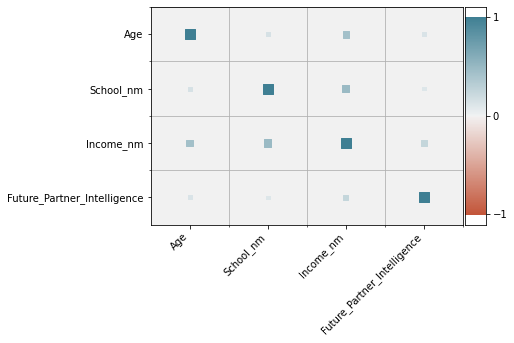

In [249]:
df_me_sin = data[['Age','School_nm','Income_nm','Future_Partner_Intelligence']]
corrplot(df_me_sin.corr(), size_scale=100, marker='s')  ## use in dataframe

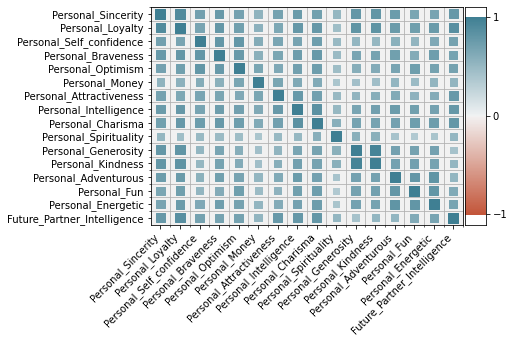

In [250]:
df_me_sin = data[['Personal_Sincerity','Personal_Loyalty','Personal_Self_confidence','Personal_Braveness','Personal_Optimism','Personal_Money','Personal_Attractiveness','Personal_Intelligence','Personal_Charisma','Personal_Spirituality','Personal_Generosity','Personal_Kindness','Personal_Adventurous','Personal_Fun','Personal_Energetic','Future_Partner_Intelligence']]
corrplot(df_me_sin.corr(), size_scale=100, marker='s')  ## use in dataframe

## Future_Partner_Charisma

In [251]:
anova_test('Future_Partner_Charisma', 'Age', data)

  Source  ddof1  ddof2       F  p-unc    np2
0    Age     12      3  15.219  0.023  0.984


In [252]:
anova_test('Future_Partner_Charisma', 'Age_nm', data)

   Source  ddof1  ddof2      F  p-unc    np2
0  Age_nm      4     11  0.743  0.582  0.213


In [253]:
anova_test('Future_Partner_Charisma', 'School_nm', data)

      Source  ddof1  ddof2      F  p-unc    np2
0  School_nm      2     13  2.007  0.174  0.236


In [254]:
anova_test('Future_Partner_Charisma', 'Income_nm', data)

      Source  ddof1  ddof2      F  p-unc    np2
0  Income_nm      5     10  0.526  0.752  0.208


In [255]:
anova_test('Future_Partner_Charisma', 'Gender', data)

   Source  ddof1  ddof2      F  p-unc    np2
0  Gender      1     14  0.028  0.869  0.002


In [256]:
anova_test('Future_Partner_Charisma', 'Relationship', data)

         Source  ddof1  ddof2  np2
0  Relationship      0     15  0.0


In [257]:
anova_test('Future_Partner_Charisma', ['Age','Gender'], data)

         Source        SS    DF       MS             F  p-unc  np2
0           Age  2173.603  12.0  181.134  5.463749e+29    0.0  1.0
1        Gender     5.538   1.0    5.538  1.670547e+28    0.0  1.0
2  Age * Gender    75.599  12.0    6.300  1.900328e+28    0.0  1.0
3      Residual     0.000   1.0    0.000           NaN    NaN  NaN


C:\Users\catar\anaconda3\envs\Ironhack\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 12, but rank is 3
  warnings.warn('covariance of constraints does not have full '


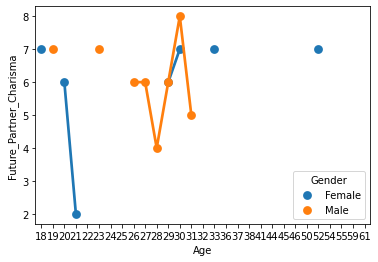

In [258]:
abc = data.groupby(['Age','Gender'], as_index=False).mean()
ax = sns.pointplot(x='Age', y='Future_Partner_Charisma', hue='Gender', data=abc)

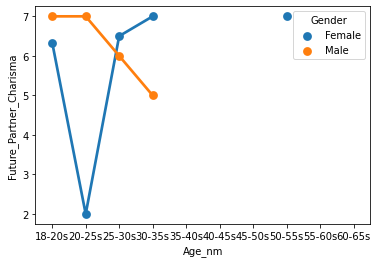

In [259]:
abc = data.groupby(['Age_nm','Gender'], as_index=False).mean()
ax = sns.pointplot(x='Age_nm', y='Future_Partner_Charisma', hue='Gender', data=abc)

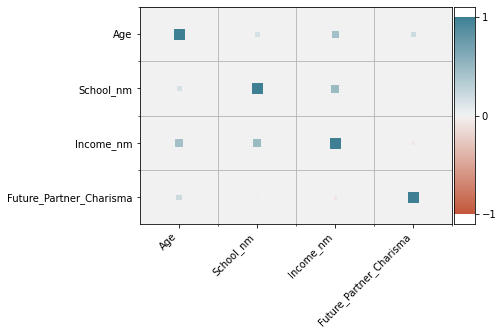

In [260]:
df_me_sin = data[['Age','School_nm','Income_nm','Future_Partner_Charisma']]
corrplot(df_me_sin.corr(), size_scale=100, marker='s')  ## use in dataframe

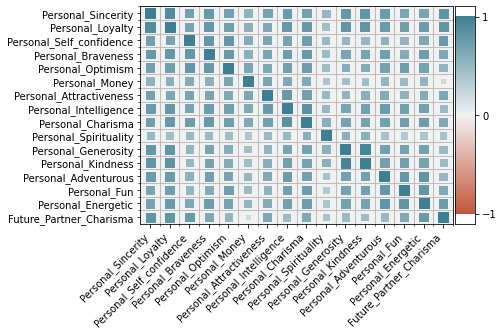

In [261]:
df_me_sin = data[['Personal_Sincerity','Personal_Loyalty','Personal_Self_confidence','Personal_Braveness','Personal_Optimism','Personal_Money','Personal_Attractiveness','Personal_Intelligence','Personal_Charisma','Personal_Spirituality','Personal_Generosity','Personal_Kindness','Personal_Adventurous','Personal_Fun','Personal_Energetic','Future_Partner_Charisma']]
corrplot(df_me_sin.corr(), size_scale=100, marker='s')  ## use in dataframe

## Future_Partner_Spirituality

In [262]:
anova_test('Future_Partner_Spirituality', 'Age', data)

  Source  ddof1  ddof2      F  p-unc    np2
0    Age     12      3  3.098  0.191  0.925


In [263]:
anova_test('Future_Partner_Spirituality', 'Age_nm', data)

   Source  ddof1  ddof2      F  p-unc   np2
0  Age_nm      4     11  0.822  0.538  0.23


In [264]:
anova_test('Future_Partner_Spirituality', 'School_nm', data)

      Source  ddof1  ddof2      F  p-unc    np2
0  School_nm      2     13  0.613  0.556  0.086


In [265]:
anova_test('Future_Partner_Spirituality', 'Income_nm', data)

      Source  ddof1  ddof2     F  p-unc    np2
0  Income_nm      5     10  0.93  0.501  0.317


In [266]:
anova_test('Future_Partner_Spirituality', 'Gender', data)

   Source  ddof1  ddof2    F  p-unc  np2
0  Gender      1     14  0.0    1.0  0.0


In [267]:
anova_test('Future_Partner_Spirituality', 'Relationship', data)

         Source  ddof1  ddof2  np2
0  Relationship      0     15  0.0


In [268]:
anova_test('Future_Partner_Spirituality', ['Age','Gender'], data)

         Source       SS    DF      MS       F  p-unc    np2
0           Age  752.976  12.0  62.748  13.944  0.194  0.994
1        Gender    2.682   1.0   2.682   0.596  0.581  0.373
2  Age * Gender   83.256  12.0   6.938   1.542  0.564  0.949
3      Residual    4.500   1.0   4.500     NaN    NaN    NaN


C:\Users\catar\anaconda3\envs\Ironhack\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 12, but rank is 3
  warnings.warn('covariance of constraints does not have full '


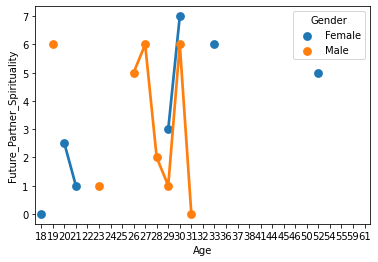

In [269]:
abc = data.groupby(['Age','Gender'], as_index=False).mean()
ax = sns.pointplot(x='Age', y='Future_Partner_Spirituality', hue='Gender', data=abc)

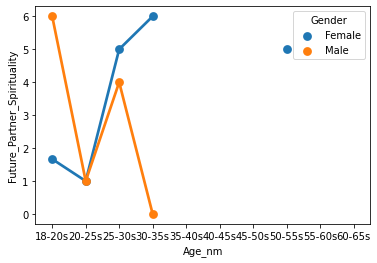

In [270]:
abc = data.groupby(['Age_nm','Gender'], as_index=False).mean()
ax = sns.pointplot(x='Age_nm', y='Future_Partner_Spirituality', hue='Gender', data=abc)

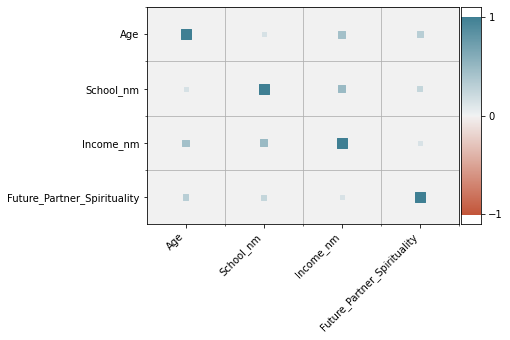

In [271]:
df_me_sin = data[['Age','School_nm','Income_nm','Future_Partner_Spirituality']]
corrplot(df_me_sin.corr(), size_scale=100, marker='s')  ## use in dataframe

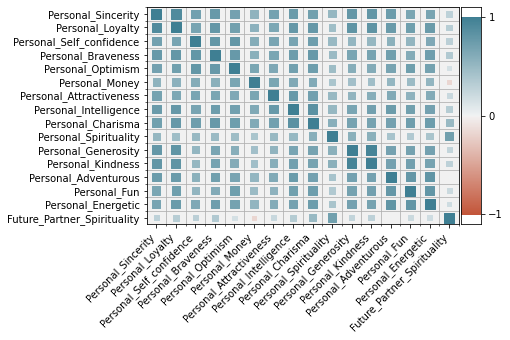

In [272]:
df_me_sin = data[['Personal_Sincerity','Personal_Loyalty','Personal_Self_confidence','Personal_Braveness','Personal_Optimism','Personal_Money','Personal_Attractiveness','Personal_Intelligence','Personal_Charisma','Personal_Spirituality','Personal_Generosity','Personal_Kindness','Personal_Adventurous','Personal_Fun','Personal_Energetic','Future_Partner_Spirituality']]
corrplot(df_me_sin.corr(), size_scale=100, marker='s')  ## use in dataframe

## Future_Partner_Generosity

In [273]:
anova_test('Future_Partner_Generosity', 'Age', data)

  Source  ddof1  ddof2      F  p-unc    np2
0    Age     12      3  4.552  0.119  0.948


In [274]:
anova_test('Future_Partner_Generosity', 'Age_nm', data)

   Source  ddof1  ddof2      F  p-unc    np2
0  Age_nm      4     11  3.788  0.036  0.579


In [275]:
anova_test('Future_Partner_Generosity', 'School_nm', data)

      Source  ddof1  ddof2      F  p-unc    np2
0  School_nm      2     13  0.683  0.522  0.095


In [276]:
anova_test('Future_Partner_Generosity', 'Income_nm', data)

      Source  ddof1  ddof2     F  p-unc    np2
0  Income_nm      5     10  2.02  0.161  0.503


In [277]:
anova_test('Future_Partner_Generosity', 'Gender', data)

   Source  ddof1  ddof2      F  p-unc    np2
0  Gender      1     14  1.342  0.266  0.087


In [278]:
anova_test('Future_Partner_Generosity', 'Relationship', data)

         Source  ddof1  ddof2  np2
0  Relationship      0     15  0.0


In [279]:
anova_test('Future_Partner_Generosity', ['Age','Gender'], data)

         Source        SS    DF       MS             F  p-unc  np2
0           Age  2084.884  12.0  173.740  4.859174e+29    0.0  1.0
1        Gender    25.959   1.0   25.959  7.260083e+28    0.0  1.0
2  Age * Gender   105.779  12.0    8.815  2.465357e+28    0.0  1.0
3      Residual     0.000   1.0    0.000           NaN    NaN  NaN


C:\Users\catar\anaconda3\envs\Ironhack\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 12, but rank is 3
  warnings.warn('covariance of constraints does not have full '


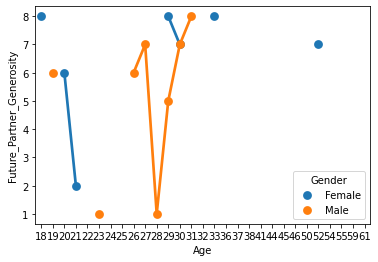

In [280]:
abc = data.groupby(['Age','Gender'], as_index=False).mean()
ax = sns.pointplot(x='Age', y='Future_Partner_Generosity', hue='Gender', data=abc)

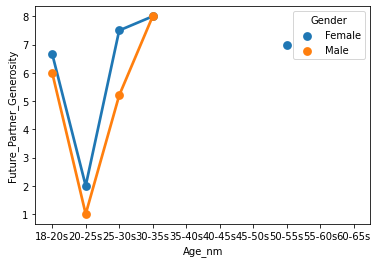

In [281]:
abc = data.groupby(['Age_nm','Gender'], as_index=False).mean()
ax = sns.pointplot(x='Age_nm', y='Future_Partner_Generosity', hue='Gender', data=abc)

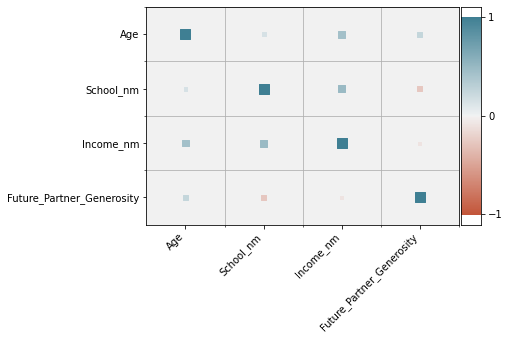

In [282]:
df_me_sin = data[['Age','School_nm','Income_nm','Future_Partner_Generosity']]
corrplot(df_me_sin.corr(), size_scale=100, marker='s')  ## use in dataframe

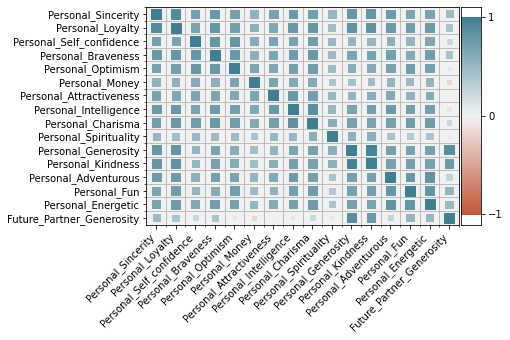

In [283]:
df_me_sin = data[['Personal_Sincerity','Personal_Loyalty','Personal_Self_confidence','Personal_Braveness','Personal_Optimism','Personal_Money','Personal_Attractiveness','Personal_Intelligence','Personal_Charisma','Personal_Spirituality','Personal_Generosity','Personal_Kindness','Personal_Adventurous','Personal_Fun','Personal_Energetic','Future_Partner_Generosity']]
corrplot(df_me_sin.corr(), size_scale=100, marker='s')  ## use in dataframe

## Future_Partner_Kindness

In [284]:
anova_test('Future_Partner_Kindness', 'Age', data)

  Source  ddof1  ddof2      F  p-unc   np2
0    Age     12      3  2.538   0.24  0.91


In [285]:
anova_test('Future_Partner_Kindness', 'Age_nm', data)

   Source  ddof1  ddof2      F  p-unc    np2
0  Age_nm      4     11  1.662  0.228  0.377


In [286]:
anova_test('Future_Partner_Kindness', 'School_nm', data)

      Source  ddof1  ddof2      F  p-unc    np2
0  School_nm      2     13  2.066  0.166  0.241


In [287]:
anova_test('Future_Partner_Kindness', 'Income_nm', data)

      Source  ddof1  ddof2      F  p-unc    np2
0  Income_nm      5     10  1.597  0.247  0.444


In [288]:
anova_test('Future_Partner_Kindness', 'Gender', data)

   Source  ddof1  ddof2      F  p-unc    np2
0  Gender      1     14  0.256  0.621  0.018


In [289]:
anova_test('Future_Partner_Kindness', 'Relationship', data)

         Source  ddof1  ddof2  np2
0  Relationship      0     15  0.0


In [290]:
anova_test('Future_Partner_Kindness', ['Age','Gender'], data)

         Source        SS    DF       MS        F  p-unc    np2
0           Age  2404.486  12.0  200.374  400.748  0.037  1.000
1        Gender    12.259   1.0   12.259   24.518  0.127  0.961
2  Age * Gender   104.378  12.0    8.698   17.396  0.185  0.995
3      Residual     0.500   1.0    0.500      NaN    NaN    NaN


C:\Users\catar\anaconda3\envs\Ironhack\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 12, but rank is 3
  warnings.warn('covariance of constraints does not have full '


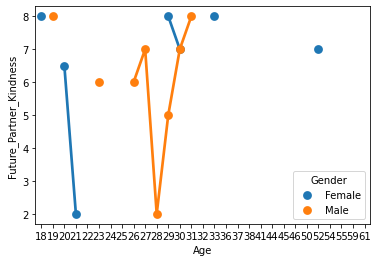

In [291]:
abc = data.groupby(['Age','Gender'], as_index=False).mean()
ax = sns.pointplot(x='Age', y='Future_Partner_Kindness', hue='Gender', data=abc)

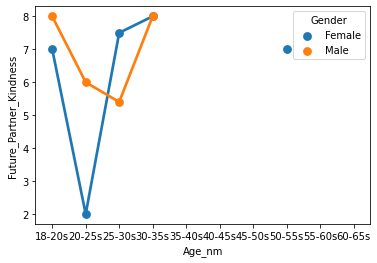

In [292]:
abc = data.groupby(['Age_nm','Gender'], as_index=False).mean()
ax = sns.pointplot(x='Age_nm', y='Future_Partner_Kindness', hue='Gender', data=abc)

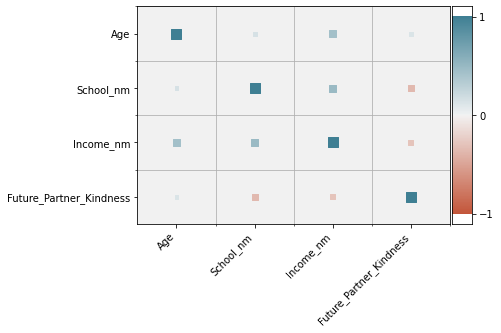

In [293]:
df_me_sin = data[['Age','School_nm','Income_nm','Future_Partner_Kindness']]
corrplot(df_me_sin.corr(), size_scale=100, marker='s')  ## use in dataframe

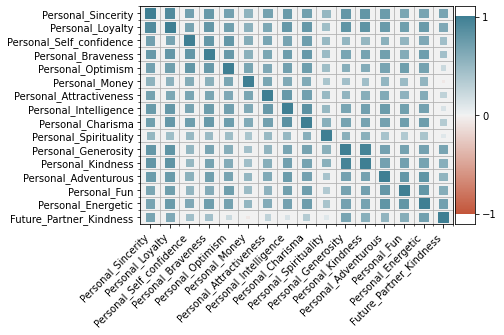

In [294]:
df_me_sin = data[['Personal_Sincerity','Personal_Loyalty','Personal_Self_confidence','Personal_Braveness','Personal_Optimism','Personal_Money','Personal_Attractiveness','Personal_Intelligence','Personal_Charisma','Personal_Spirituality','Personal_Generosity','Personal_Kindness','Personal_Adventurous','Personal_Fun','Personal_Energetic','Future_Partner_Kindness']]
corrplot(df_me_sin.corr(), size_scale=100, marker='s')  ## use in dataframe

## Future_Partner_Adventurous

In [295]:
anova_test('Future_Partner_Adventurous', 'Age', data)

  Source  ddof1  ddof2       F  p-unc    np2
0    Age     12      3  18.625  0.017  0.987


In [296]:
anova_test('Future_Partner_Adventurous', 'Age_nm', data)

   Source  ddof1  ddof2      F  p-unc    np2
0  Age_nm      4     11  1.105  0.402  0.287


In [297]:
anova_test('Future_Partner_Adventurous', 'School_nm', data)

      Source  ddof1  ddof2     F  p-unc    np2
0  School_nm      2     13  3.07  0.081  0.321


In [298]:
anova_test('Future_Partner_Adventurous', 'Income_nm', data)

      Source  ddof1  ddof2      F  p-unc    np2
0  Income_nm      5     10  0.713  0.628  0.263


In [299]:
anova_test('Future_Partner_Adventurous', 'Gender', data)

   Source  ddof1  ddof2      F  p-unc    np2
0  Gender      1     14  0.093  0.764  0.007


In [300]:
anova_test('Future_Partner_Adventurous', 'Relationship', data)

         Source  ddof1  ddof2  np2
0  Relationship      0     15  0.0


In [301]:
anova_test('Future_Partner_Adventurous', ['Age','Gender'], data)

         Source        SS    DF       MS        F  p-unc    np2
0           Age  2223.098  12.0  185.258  370.516  0.038  1.000
1        Gender     4.525   1.0    4.525    9.049  0.204  0.900
2  Age * Gender    81.725  12.0    6.810   13.621  0.209  0.994
3      Residual     0.500   1.0    0.500      NaN    NaN    NaN


C:\Users\catar\anaconda3\envs\Ironhack\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 12, but rank is 3
  warnings.warn('covariance of constraints does not have full '


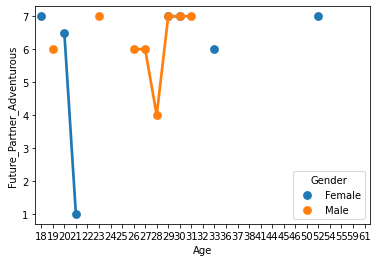

In [302]:
abc = data.groupby(['Age','Gender'], as_index=False).mean()
ax = sns.pointplot(x='Age', y='Future_Partner_Adventurous', hue='Gender', data=abc)

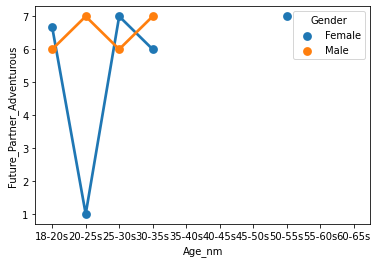

In [303]:
abc = data.groupby(['Age_nm','Gender'], as_index=False).mean()
ax = sns.pointplot(x='Age_nm', y='Future_Partner_Adventurous', hue='Gender', data=abc)

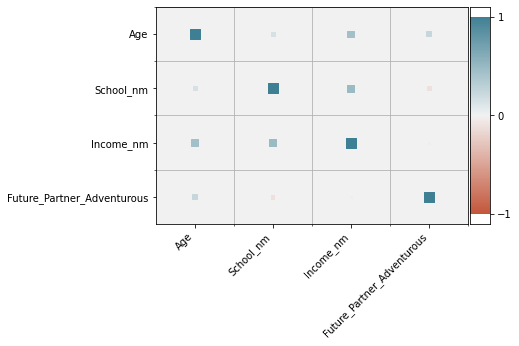

In [304]:
df_me_sin = data[['Age','School_nm','Income_nm','Future_Partner_Adventurous']]
corrplot(df_me_sin.corr(), size_scale=100, marker='s')  ## use in dataframe

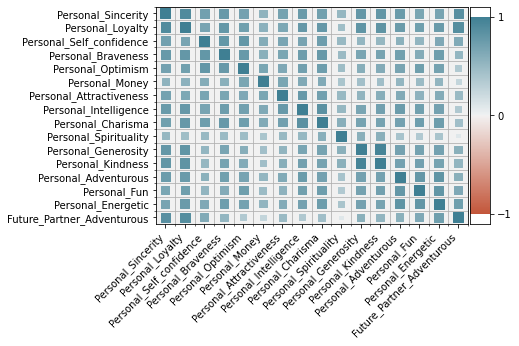

In [305]:
df_me_sin = data[['Personal_Sincerity','Personal_Loyalty','Personal_Self_confidence','Personal_Braveness','Personal_Optimism','Personal_Money','Personal_Attractiveness','Personal_Intelligence','Personal_Charisma','Personal_Spirituality','Personal_Generosity','Personal_Kindness','Personal_Adventurous','Personal_Fun','Personal_Energetic','Future_Partner_Adventurous']]
corrplot(df_me_sin.corr(), size_scale=100, marker='s')  ## use in dataframe

## Future_Partner_Fun

In [306]:
anova_test('Future_Partner_Fun', 'Age', data)

  Source  ddof1  ddof2     F  p-unc    np2
0    Age     12      3  6.75  0.071  0.964


In [307]:
anova_test('Future_Partner_Fun', 'Age_nm', data)

   Source  ddof1  ddof2      F  p-unc    np2
0  Age_nm      4     11  1.867  0.187  0.404


In [308]:
anova_test('Future_Partner_Fun', 'School_nm', data)

      Source  ddof1  ddof2      F  p-unc    np2
0  School_nm      2     13  2.807  0.097  0.302


In [309]:
anova_test('Future_Partner_Fun', 'Income_nm', data)

      Source  ddof1  ddof2      F  p-unc   np2
0  Income_nm      5     10  0.127  0.983  0.06


In [310]:
anova_test('Future_Partner_Fun', 'Gender', data)

   Source  ddof1  ddof2      F  p-unc    np2
0  Gender      1     14  0.126  0.728  0.009


In [311]:
anova_test('Future_Partner_Fun', 'Relationship', data)

         Source  ddof1  ddof2  np2
0  Relationship      0     15  0.0


In [312]:
anova_test('Future_Partner_Fun', ['Age','Gender'], data)

         Source        SS    DF       MS             F  p-unc  np2
0           Age  2486.995  12.0  207.250  6.931926e+29    0.0  1.0
1        Gender     4.699   1.0    4.699  1.571563e+28    0.0  1.0
2  Age * Gender    82.251  12.0    6.854  2.292568e+28    0.0  1.0
3      Residual     0.000   1.0    0.000           NaN    NaN  NaN


C:\Users\catar\anaconda3\envs\Ironhack\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 12, but rank is 3
  warnings.warn('covariance of constraints does not have full '


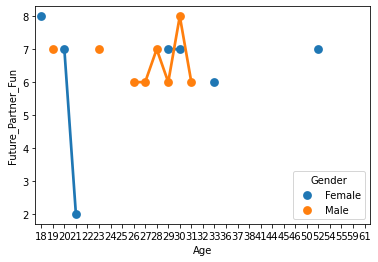

In [313]:
abc = data.groupby(['Age','Gender'], as_index=False).mean()
ax = sns.pointplot(x='Age', y='Future_Partner_Fun', hue='Gender', data=abc)

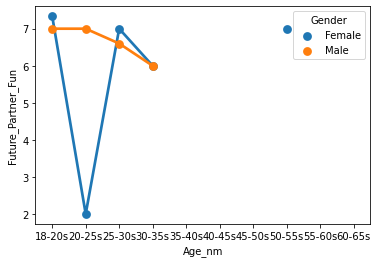

In [314]:
abc = data.groupby(['Age_nm','Gender'], as_index=False).mean()
ax = sns.pointplot(x='Age_nm', y='Future_Partner_Fun', hue='Gender', data=abc)

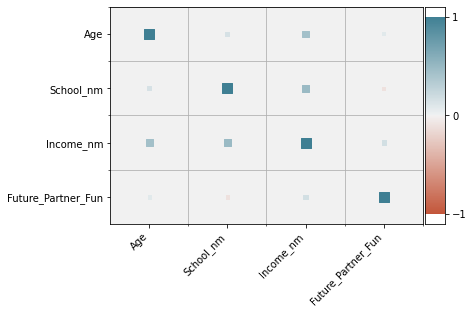

In [315]:
df_me_sin = data[['Age','School_nm','Income_nm','Future_Partner_Fun']]
corrplot(df_me_sin.corr(), size_scale=100, marker='s')  ## use in dataframe

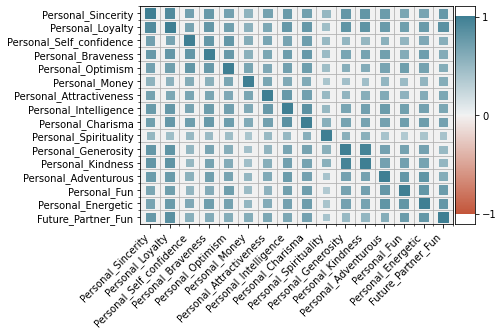

In [316]:
df_me_sin = data[['Personal_Sincerity','Personal_Loyalty','Personal_Self_confidence','Personal_Braveness','Personal_Optimism','Personal_Money','Personal_Attractiveness','Personal_Intelligence','Personal_Charisma','Personal_Spirituality','Personal_Generosity','Personal_Kindness','Personal_Adventurous','Personal_Fun','Personal_Energetic','Future_Partner_Fun']]
corrplot(df_me_sin.corr(), size_scale=100, marker='s')  ## use in dataframe

 ## Future_Partner_Energetic

In [317]:
anova_test('Future_Partner_Energetic', 'Age', data)

  Source  ddof1  ddof2      F  p-unc    np2
0    Age     12      3  1.913  0.325  0.884


In [318]:
anova_test('Future_Partner_Energetic', 'Age_nm', data)

   Source  ddof1  ddof2     F  p-unc    np2
0  Age_nm      4     11  1.82  0.195  0.398


In [319]:
anova_test('Future_Partner_Energetic', 'School_nm', data)

      Source  ddof1  ddof2      F  p-unc   np2
0  School_nm      2     13  4.517  0.032  0.41


In [320]:
anova_test('Future_Partner_Energetic', 'Income_nm', data)

      Source  ddof1  ddof2      F  p-unc    np2
0  Income_nm      5     10  0.313  0.894  0.135


In [321]:
anova_test('Future_Partner_Energetic', 'Gender', data)

   Source  ddof1  ddof2      F  p-unc    np2
0  Gender      1     14  0.023  0.883  0.002


In [322]:
anova_test('Future_Partner_Energetic', 'Relationship', data)

         Source  ddof1  ddof2  np2
0  Relationship      0     15  0.0


In [323]:
anova_test('Future_Partner_Energetic', ['Age','Gender'], data)

         Source        SS    DF       MS       F  p-unc    np2
0           Age  2172.972  12.0  181.081  90.540  0.077  0.999
1        Gender     5.380   1.0    5.380   2.690  0.349  0.729
2  Age * Gender    81.757  12.0    6.813   3.407  0.402  0.976
3      Residual     2.000   1.0    2.000     NaN    NaN    NaN


C:\Users\catar\anaconda3\envs\Ironhack\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 12, but rank is 3
  warnings.warn('covariance of constraints does not have full '


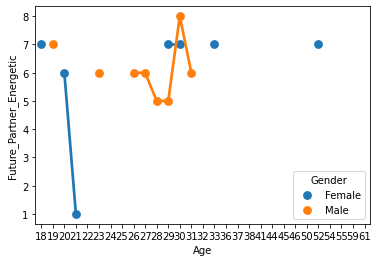

In [324]:
abc = data.groupby(['Age','Gender'], as_index=False).mean()
ax = sns.pointplot(x='Age', y='Future_Partner_Energetic', hue='Gender', data=abc)

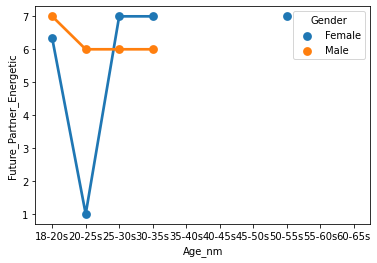

In [325]:
abc = data.groupby(['Age_nm','Gender'], as_index=False).mean()
ax = sns.pointplot(x='Age_nm', y='Future_Partner_Energetic', hue='Gender', data=abc)

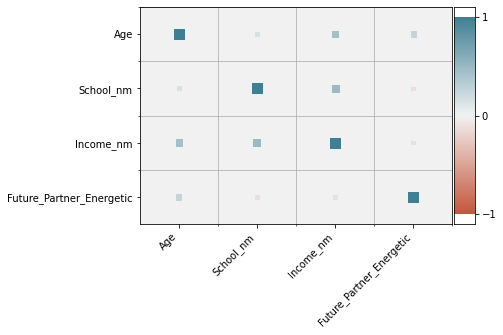

In [326]:
df_me_sin = data[['Age','School_nm','Income_nm','Future_Partner_Energetic']]
corrplot(df_me_sin.corr(), size_scale=100, marker='s')  ## use in dataframe

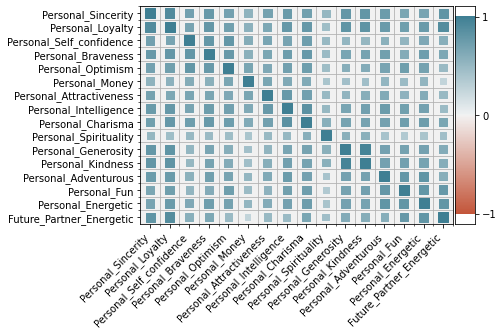

In [327]:
df_me_sin = data[['Personal_Sincerity','Personal_Loyalty','Personal_Self_confidence','Personal_Braveness','Personal_Optimism','Personal_Money','Personal_Attractiveness','Personal_Intelligence','Personal_Charisma','Personal_Spirituality','Personal_Generosity','Personal_Kindness','Personal_Adventurous','Personal_Fun','Personal_Energetic','Future_Partner_Energetic']]
corrplot(df_me_sin.corr(), size_scale=100, marker='s')  ## use in dataframe

# Partner Characteristics
## Partner_Sincerity

In [328]:
anova_test('Partner_Sincerity', 'Age', data)

  Source  ddof1  ddof2      F  p-unc    np2
0    Age     24     45  2.898  0.001  0.607


In [329]:
anova_test('Partner_Sincerity', 'Age_nm', data)

   Source  ddof1  ddof2      F  p-unc    np2
0  Age_nm      9     60  3.161  0.003  0.322


In [330]:
anova_test('Partner_Sincerity', 'School_nm', data)

      Source  ddof1  ddof2      F  p-unc    np2
0  School_nm      5     64  2.576  0.035  0.168


In [331]:
anova_test('Partner_Sincerity', 'Income_nm', data)

      Source  ddof1  ddof2      F  p-unc    np2
0  Income_nm      6     63  1.679  0.141  0.138


In [332]:
anova_test('Partner_Sincerity', 'Gender', data)

   Source  ddof1  ddof2      F  p-unc    np2
0  Gender      1     68  1.807  0.183  0.026


In [333]:
anova_test('Partner_Sincerity', 'Relationship', data)

         Source  ddof1  ddof2  np2
0  Relationship      0     69  0.0


In [334]:
anova_test('Partner_Sincerity', 'Relationship_score', data)

               Source  ddof1  ddof2       F  p-unc    np2
0  Relationship_score     27     42  13.705    0.0  0.898


In [335]:
anova_test('Partner_Sincerity', 'Relationship_rate', data)

              Source  ddof1  ddof2      F  p-unc    np2
0  Relationship_rate      3     66  4.716  0.005  0.177


In [336]:
anova_test('Partner_Sincerity', 'Time_together', data)

          Source  ddof1  ddof2      F  p-unc    np2
0  Time_together     34     35  1.085  0.405  0.513


In [337]:
anova_test('Partner_Sincerity', ['Age','Gender'], data)

         Source        SS    DF       MS        F  p-unc    np2
0           Age  6738.139  24.0  280.756  120.669  0.000  0.988
1        Gender     0.086   1.0    0.086    0.037  0.849  0.001
2  Age * Gender   145.253  24.0    6.052    2.601  0.005  0.641
3      Residual    81.433  35.0    2.327      NaN    NaN    NaN


C:\Users\catar\anaconda3\envs\Ironhack\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 24, but rank is 11
  warnings.warn('covariance of constraints does not have full '


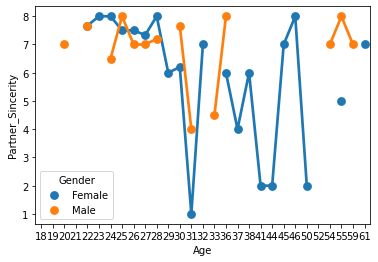

In [338]:
abc = data.groupby(['Age','Gender'], as_index=False).mean()
ax = sns.pointplot(x='Age', y='Partner_Sincerity', hue='Gender', data=abc)

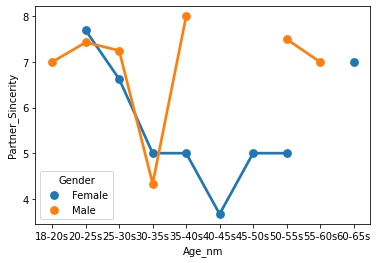

In [339]:
abc = data.groupby(['Age_nm','Gender'], as_index=False).mean()
ax = sns.pointplot(x='Age_nm', y='Partner_Sincerity', hue='Gender', data=abc)

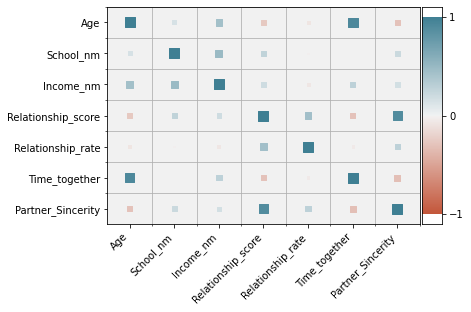

In [340]:
df_me_sin = data[['Age','School_nm','Income_nm','Relationship_score','Relationship_rate','Time_together','Partner_Sincerity']]
corrplot(df_me_sin.corr(), size_scale=100, marker='s')  ## use in dataframe

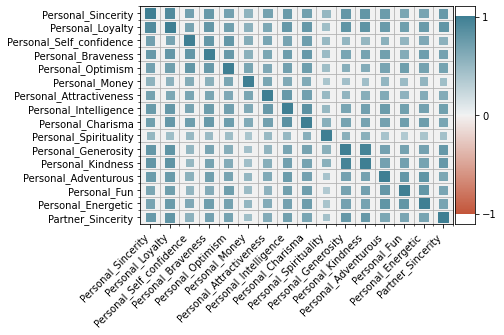

In [341]:
df_me_sin = data[['Personal_Sincerity','Personal_Loyalty','Personal_Self_confidence','Personal_Braveness','Personal_Optimism','Personal_Money','Personal_Attractiveness','Personal_Intelligence','Personal_Charisma','Personal_Spirituality','Personal_Generosity','Personal_Kindness','Personal_Adventurous','Personal_Fun','Personal_Energetic','Partner_Sincerity']]
corrplot(df_me_sin.corr(), size_scale=100, marker='s')  ## use in dataframe

## Partner_Loyalty

In [342]:
anova_test('Partner_Loyalty', 'Age', data)

  Source  ddof1  ddof2      F  p-unc    np2
0    Age     24     45  2.375  0.006  0.559


In [343]:
anova_test('Partner_Loyalty', 'Age_nm', data)

   Source  ddof1  ddof2      F  p-unc    np2
0  Age_nm      9     60  2.675  0.011  0.286


In [344]:
anova_test('Partner_Loyalty', 'School_nm', data)

      Source  ddof1  ddof2      F  p-unc    np2
0  School_nm      5     64  3.811  0.004  0.229


In [345]:
anova_test('Partner_Loyalty', 'Income_nm', data)

      Source  ddof1  ddof2      F  p-unc    np2
0  Income_nm      6     63  1.657  0.146  0.136


In [346]:
anova_test('Partner_Loyalty', 'Gender', data)

   Source  ddof1  ddof2      F  p-unc    np2
0  Gender      1     68  2.025  0.159  0.029


In [347]:
anova_test('Partner_Loyalty', 'Relationship', data)

         Source  ddof1  ddof2  np2
0  Relationship      0     69  0.0


In [348]:
anova_test('Partner_Loyalty', 'Relationship_score', data)

               Source  ddof1  ddof2       F  p-unc    np2
0  Relationship_score     27     42  47.603    0.0  0.968


In [349]:
anova_test('Partner_Loyalty', 'Relationship_rate', data)

              Source  ddof1  ddof2      F  p-unc    np2
0  Relationship_rate      3     66  4.637  0.005  0.174


In [350]:
anova_test('Partner_Loyalty', 'Time_together', data)

          Source  ddof1  ddof2      F  p-unc    np2
0  Time_together     34     35  0.888  0.634  0.463


In [351]:
anova_test('Partner_Loyalty', ['Age','Gender'], data)

         Source        SS    DF       MS        F  p-unc    np2
0           Age  7409.694  24.0  308.737  149.630  0.000  0.990
1        Gender     0.087   1.0    0.087    0.042  0.838  0.001
2  Age * Gender   175.674  24.0    7.320    3.548  0.000  0.709
3      Residual    72.217  35.0    2.063      NaN    NaN    NaN


C:\Users\catar\anaconda3\envs\Ironhack\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 24, but rank is 11
  warnings.warn('covariance of constraints does not have full '


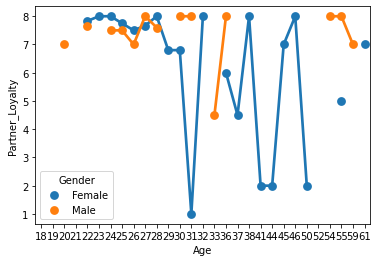

In [352]:
abc = data.groupby(['Age','Gender'], as_index=False).mean()
ax = sns.pointplot(x='Age', y='Partner_Loyalty', hue='Gender', data=abc)

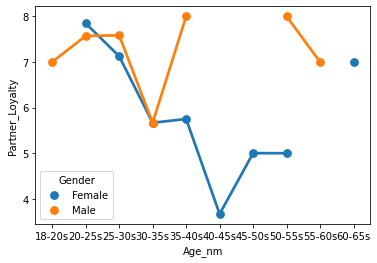

In [353]:
abc = data.groupby(['Age_nm','Gender'], as_index=False).mean()
ax = sns.pointplot(x='Age_nm', y='Partner_Loyalty', hue='Gender', data=abc)

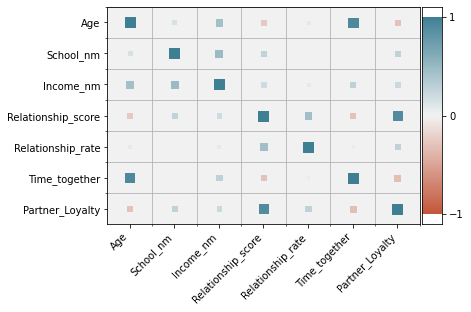

In [354]:
df_me_sin = data[['Age','School_nm','Income_nm','Relationship_score','Relationship_rate','Time_together','Partner_Loyalty']]
corrplot(df_me_sin.corr(), size_scale=100, marker='s')  ## use in dataframe

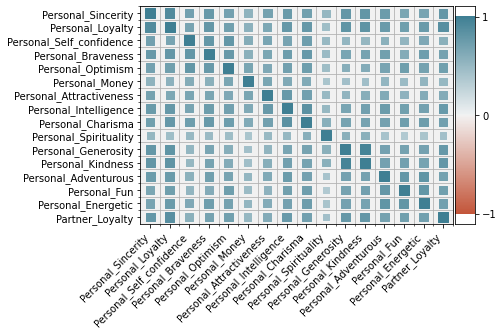

In [355]:
df_me_sin = data[['Personal_Sincerity','Personal_Loyalty','Personal_Self_confidence','Personal_Braveness','Personal_Optimism','Personal_Money','Personal_Attractiveness','Personal_Intelligence','Personal_Charisma','Personal_Spirituality','Personal_Generosity','Personal_Kindness','Personal_Adventurous','Personal_Fun','Personal_Energetic','Partner_Loyalty']]
corrplot(df_me_sin.corr(), size_scale=100, marker='s')  ## use in dataframe

## Partner_Self_confidence

In [356]:
anova_test('Partner_Self_confidence', 'Age_nm', data)

   Source  ddof1  ddof2      F  p-unc    np2
0  Age_nm      9     60  1.443  0.191  0.178


In [357]:
anova_test('Partner_Self_confidence', 'School_nm', data)

      Source  ddof1  ddof2      F  p-unc    np2
0  School_nm      5     64  1.138  0.349  0.082


In [358]:
anova_test('Partner_Self_confidence', 'Income_nm', data)

      Source  ddof1  ddof2      F  p-unc    np2
0  Income_nm      6     63  1.054    0.4  0.091


In [359]:
anova_test('Partner_Self_confidence', 'Gender', data)

   Source  ddof1  ddof2      F  p-unc    np2
0  Gender      1     68  0.093  0.762  0.001


In [360]:
anova_test('Partner_Self_confidence', 'Relationship', data)

         Source  ddof1  ddof2  np2
0  Relationship      0     69  0.0


In [361]:
anova_test('Partner_Self_confidence', 'Relationship_score', data)

               Source  ddof1  ddof2     F  p-unc    np2
0  Relationship_score     27     42  3.13    0.0  0.668


In [362]:
anova_test('Partner_Self_confidence', 'Relationship_rate', data)

              Source  ddof1  ddof2     F  p-unc    np2
0  Relationship_rate      3     66  2.81  0.046  0.113


In [363]:
anova_test('Partner_Self_confidence', 'Time_together', data)

          Source  ddof1  ddof2      F  p-unc    np2
0  Time_together     34     35  1.205  0.293  0.539


In [364]:
anova_test('Partner_Self_confidence', ['Age','Gender'], data)

         Source        SS    DF       MS       F  p-unc    np2
0           Age  4398.199  24.0  183.258  45.918  0.000  0.969
1        Gender     7.385   1.0    7.385   1.850  0.182  0.050
2  Age * Gender   133.475  24.0    5.561   1.394  0.182  0.489
3      Residual   139.683  35.0    3.991     NaN    NaN    NaN


C:\Users\catar\anaconda3\envs\Ironhack\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 24, but rank is 11
  warnings.warn('covariance of constraints does not have full '


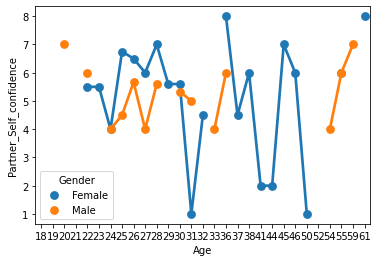

In [365]:
abc = data.groupby(['Age','Gender'], as_index=False).mean()
ax = sns.pointplot(x='Age', y='Partner_Self_confidence', hue='Gender', data=abc)

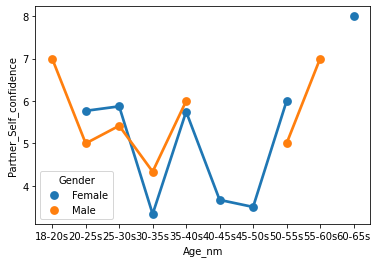

In [366]:
abc = data.groupby(['Age_nm','Gender'], as_index=False).mean()
ax = sns.pointplot(x='Age_nm', y='Partner_Self_confidence', hue='Gender', data=abc)

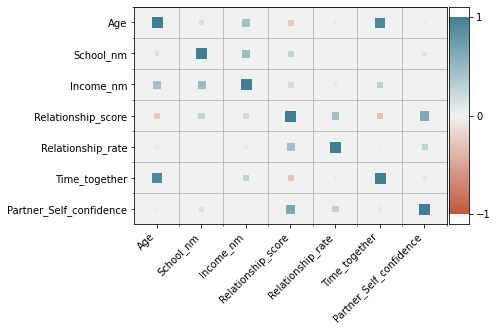

In [367]:
df_me_sin = data[['Age','School_nm','Income_nm','Relationship_score','Relationship_rate','Time_together','Partner_Self_confidence']]
corrplot(df_me_sin.corr(), size_scale=100, marker='s')  ## use in dataframe

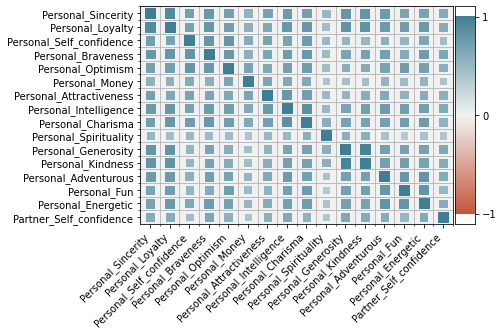

In [368]:
df_me_sin = data[['Personal_Sincerity','Personal_Loyalty','Personal_Self_confidence','Personal_Braveness','Personal_Optimism','Personal_Money','Personal_Attractiveness','Personal_Intelligence','Personal_Charisma','Personal_Spirituality','Personal_Generosity','Personal_Kindness','Personal_Adventurous','Personal_Fun','Personal_Energetic','Partner_Self_confidence']]
corrplot(df_me_sin.corr(), size_scale=100, marker='s')  ## use in dataframe

## Partner_Braveness

In [369]:
anova_test('Partner_Braveness', 'Age', data)

  Source  ddof1  ddof2      F  p-unc    np2
0    Age     24     45  0.993  0.493  0.346


In [370]:
anova_test('Partner_Braveness', 'Age_nm', data)

   Source  ddof1  ddof2      F  p-unc    np2
0  Age_nm      9     60  0.804  0.614  0.108


In [371]:
anova_test('Partner_Braveness', 'School_nm', data)

      Source  ddof1  ddof2      F  p-unc    np2
0  School_nm      5     64  1.476   0.21  0.103


In [372]:
anova_test('Partner_Braveness', 'Income_nm', data)

      Source  ddof1  ddof2      F  p-unc    np2
0  Income_nm      6     63  2.506  0.031  0.193


In [373]:
anova_test('Partner_Braveness', 'Gender', data)

   Source  ddof1  ddof2      F  p-unc    np2
0  Gender      1     68  0.234   0.63  0.003


In [374]:
anova_test('Partner_Braveness', 'Relationship', data)

         Source  ddof1  ddof2  np2
0  Relationship      0     69  0.0


In [375]:
anova_test('Partner_Braveness', 'Relationship_score', data)

               Source  ddof1  ddof2      F  p-unc    np2
0  Relationship_score     27     42  4.372    0.0  0.738


In [376]:
anova_test('Partner_Braveness', 'Relationship_rate', data)

              Source  ddof1  ddof2      F  p-unc    np2
0  Relationship_rate      3     66  2.507  0.066  0.102


In [377]:
anova_test('Partner_Braveness', 'Time_together', data)

          Source  ddof1  ddof2    F  p-unc    np2
0  Time_together     34     35  0.9  0.621  0.466


In [378]:
anova_test('Partner_Braveness', ['Age','Gender'], data)

         Source        SS    DF       MS       F  p-unc    np2
0           Age  5001.471  24.0  208.395  51.221  0.000  0.972
1        Gender     0.735   1.0    0.735   0.181  0.673  0.005
2  Age * Gender   147.259  24.0    6.136   1.508  0.131  0.508
3      Residual   142.400  35.0    4.069     NaN    NaN    NaN


C:\Users\catar\anaconda3\envs\Ironhack\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 24, but rank is 11
  warnings.warn('covariance of constraints does not have full '


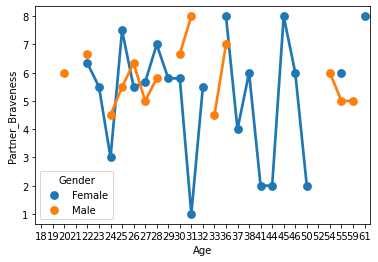

In [379]:
abc = data.groupby(['Age','Gender'], as_index=False).mean()
ax = sns.pointplot(x='Age', y='Partner_Braveness', hue='Gender', data=abc)

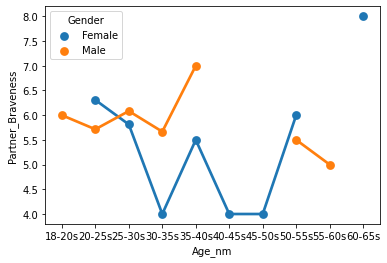

In [380]:
abc = data.groupby(['Age_nm','Gender'], as_index=False).mean()
ax = sns.pointplot(x='Age_nm', y='Partner_Braveness', hue='Gender', data=abc)

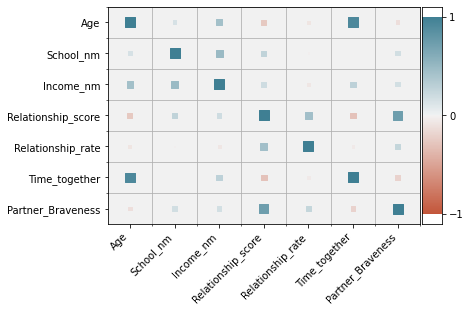

In [381]:
df_me_sin = data[['Age','School_nm','Income_nm','Relationship_score','Relationship_rate','Time_together','Partner_Braveness']]
corrplot(df_me_sin.corr(), size_scale=100, marker='s')  ## use in dataframe

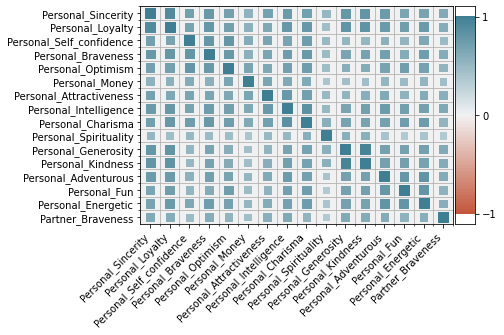

In [382]:
df_me_sin = data[['Personal_Sincerity','Personal_Loyalty','Personal_Self_confidence','Personal_Braveness','Personal_Optimism','Personal_Money','Personal_Attractiveness','Personal_Intelligence','Personal_Charisma','Personal_Spirituality','Personal_Generosity','Personal_Kindness','Personal_Adventurous','Personal_Fun','Personal_Energetic','Partner_Braveness']]
corrplot(df_me_sin.corr(), size_scale=100, marker='s')  ## use in dataframe

## Partner_Optimism

In [383]:
anova_test('Partner_Optimism', 'Age', data)

  Source  ddof1  ddof2      F  p-unc    np2
0    Age     24     45  1.127  0.355  0.375


In [384]:
anova_test('Partner_Optimism', 'Age_nm', data)

   Source  ddof1  ddof2      F  p-unc    np2
0  Age_nm      9     60  0.627  0.769  0.086


In [385]:
anova_test('Partner_Optimism', 'School_nm', data)

      Source  ddof1  ddof2     F  p-unc    np2
0  School_nm      5     64  1.01  0.419  0.073


In [386]:
anova_test('Partner_Optimism', 'Income_nm', data)

      Source  ddof1  ddof2      F  p-unc    np2
0  Income_nm      6     63  0.921  0.486  0.081


In [387]:
anova_test('Partner_Optimism', 'Gender', data)

   Source  ddof1  ddof2    F  p-unc  np2
0  Gender      1     68  0.0  0.995  0.0


In [388]:
anova_test('Partner_Optimism', 'Relationship', data)

         Source  ddof1  ddof2  np2
0  Relationship      0     69  0.0


In [389]:
anova_test('Partner_Optimism', 'Relationship_score', data)

               Source  ddof1  ddof2      F  p-unc   np2
0  Relationship_score     27     42  3.311    0.0  0.68


In [390]:
anova_test('Partner_Optimism', 'Relationship_rate', data)

              Source  ddof1  ddof2      F  p-unc    np2
0  Relationship_rate      3     66  2.899  0.041  0.116


In [391]:
anova_test('Partner_Optimism', 'Time_together', data)

          Source  ddof1  ddof2      F  p-unc    np2
0  Time_together     34     35  0.826  0.711  0.445


In [392]:
anova_test('Partner_Optimism', ['Age','Gender'], data)

         Source        SS    DF       MS       F  p-unc    np2
0           Age  4301.655  24.0  179.236  38.158  0.000  0.963
1        Gender     5.463   1.0    5.463   1.163  0.288  0.032
2  Age * Gender   116.008  24.0    4.834   1.029  0.460  0.414
3      Residual   164.400  35.0    4.697     NaN    NaN    NaN


C:\Users\catar\anaconda3\envs\Ironhack\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 24, but rank is 11
  warnings.warn('covariance of constraints does not have full '


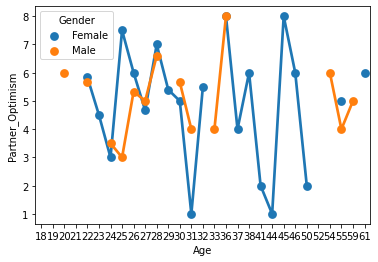

In [393]:
abc = data.groupby(['Age','Gender'], as_index=False).mean()
ax = sns.pointplot(x='Age', y='Partner_Optimism', hue='Gender', data=abc)

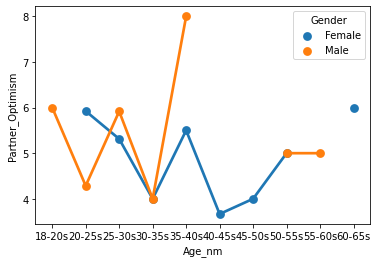

In [394]:
abc = data.groupby(['Age_nm','Gender'], as_index=False).mean()
ax = sns.pointplot(x='Age_nm', y='Partner_Optimism', hue='Gender', data=abc)

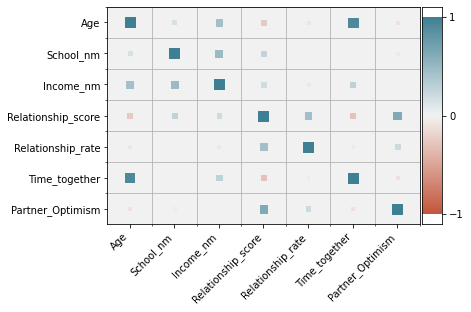

In [395]:
df_me_sin = data[['Age','School_nm','Income_nm','Relationship_score','Relationship_rate','Time_together','Partner_Optimism']]
corrplot(df_me_sin.corr(), size_scale=100, marker='s')  ## use in dataframe

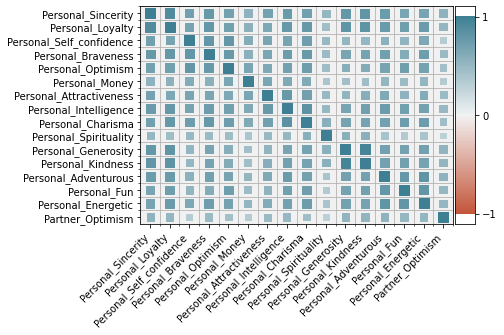

In [396]:
df_me_sin = data[['Personal_Sincerity','Personal_Loyalty','Personal_Self_confidence','Personal_Braveness','Personal_Optimism','Personal_Money','Personal_Attractiveness','Personal_Intelligence','Personal_Charisma','Personal_Spirituality','Personal_Generosity','Personal_Kindness','Personal_Adventurous','Personal_Fun','Personal_Energetic','Partner_Optimism']]
corrplot(df_me_sin.corr(), size_scale=100, marker='s')  ## use in dataframe

## Partner_Money

In [397]:
anova_test('Partner_Money', 'Age', data)

  Source  ddof1  ddof2     F  p-unc    np2
0    Age     24     45  1.31  0.213  0.411


In [398]:
anova_test('Partner_Money', 'Age_nm', data)

   Source  ddof1  ddof2      F  p-unc    np2
0  Age_nm      9     60  1.351  0.231  0.169


In [399]:
anova_test('Partner_Money', 'School_nm', data)

      Source  ddof1  ddof2      F  p-unc   np2
0  School_nm      5     64  2.802  0.024  0.18


In [400]:
anova_test('Partner_Money', 'Income_nm', data)

      Source  ddof1  ddof2      F  p-unc    np2
0  Income_nm      6     63  3.425  0.005  0.246


In [401]:
anova_test('Partner_Money', 'Gender', data)

   Source  ddof1  ddof2      F  p-unc    np2
0  Gender      1     68  0.455  0.502  0.007


In [402]:
anova_test('Partner_Money', 'Relationship', data)

         Source  ddof1  ddof2  np2
0  Relationship      0     69  0.0


In [403]:
anova_test('Partner_Money', 'Relationship_score', data)

               Source  ddof1  ddof2      F  p-unc   np2
0  Relationship_score     27     42  1.901   0.03  0.55


In [404]:
anova_test('Partner_Money', 'Relationship_rate', data)

              Source  ddof1  ddof2      F  p-unc    np2
0  Relationship_rate      3     66  1.306   0.28  0.056


In [405]:
anova_test('Partner_Money', 'Time_together', data)

          Source  ddof1  ddof2      F  p-unc    np2
0  Time_together     34     35  1.691  0.064  0.622


In [406]:
anova_test('Partner_Money', ['Age','Gender'], data)

         Source        SS    DF       MS       F  p-unc    np2
0           Age  3120.029  24.0  130.001  46.827  0.000  0.970
1        Gender     1.820   1.0    1.820   0.655  0.424  0.018
2  Age * Gender   136.820  24.0    5.701   2.053  0.026  0.585
3      Residual    97.167  35.0    2.776     NaN    NaN    NaN


C:\Users\catar\anaconda3\envs\Ironhack\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 24, but rank is 11
  warnings.warn('covariance of constraints does not have full '


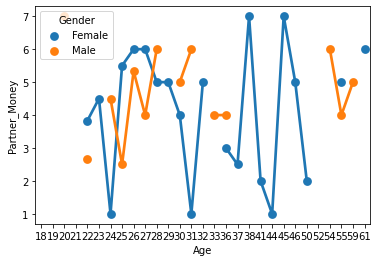

In [407]:
abc = data.groupby(['Age','Gender'], as_index=False).mean()
ax = sns.pointplot(x='Age', y='Partner_Money', hue='Gender', data=abc)

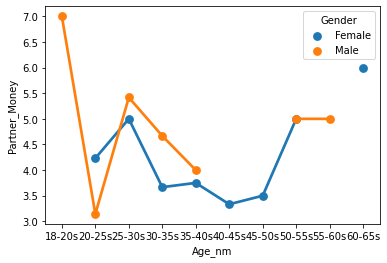

In [408]:
abc = data.groupby(['Age_nm','Gender'], as_index=False).mean()
ax = sns.pointplot(x='Age_nm', y='Partner_Money', hue='Gender', data=abc)

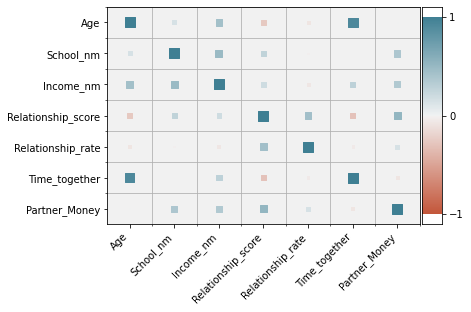

In [409]:
df_me_sin = data[['Age','School_nm','Income_nm','Relationship_score','Relationship_rate','Time_together','Partner_Money']]
corrplot(df_me_sin.corr(), size_scale=100, marker='s')  ## use in dataframe

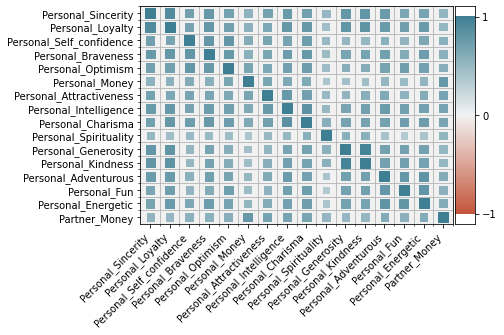

In [410]:
df_me_sin = data[['Personal_Sincerity','Personal_Loyalty','Personal_Self_confidence','Personal_Braveness','Personal_Optimism','Personal_Money','Personal_Attractiveness','Personal_Intelligence','Personal_Charisma','Personal_Spirituality','Personal_Generosity','Personal_Kindness','Personal_Adventurous','Personal_Fun','Personal_Energetic','Partner_Money']]
corrplot(df_me_sin.corr(), size_scale=100, marker='s')  ## use in dataframe

## Partner_Attractiveness

In [411]:
anova_test('Partner_Attractiveness', 'Age', data)

  Source  ddof1  ddof2      F  p-unc    np2
0    Age     24     45  2.236   0.01  0.544


In [412]:
anova_test('Partner_Attractiveness', 'Age_nm', data)

   Source  ddof1  ddof2      F  p-unc    np2
0  Age_nm      9     60  3.444  0.002  0.341


In [413]:
anova_test('Partner_Attractiveness', 'School_nm', data)

      Source  ddof1  ddof2      F  p-unc    np2
0  School_nm      5     64  2.821  0.023  0.181


In [414]:
anova_test('Partner_Attractiveness', 'Income_nm', data)

      Source  ddof1  ddof2      F  p-unc    np2
0  Income_nm      6     63  1.222  0.307  0.104


In [415]:
anova_test('Partner_Attractiveness', 'Gender', data)

   Source  ddof1  ddof2      F  p-unc    np2
0  Gender      1     68  4.806  0.032  0.066


In [416]:
anova_test('Partner_Attractiveness', 'Relationship', data)

         Source  ddof1  ddof2  np2
0  Relationship      0     69  0.0


In [417]:
anova_test('Partner_Attractiveness', 'Relationship_score', data)

               Source  ddof1  ddof2      F  p-unc    np2
0  Relationship_score     27     42  6.371    0.0  0.804


In [418]:
anova_test('Partner_Attractiveness', 'Relationship_rate', data)

              Source  ddof1  ddof2      F  p-unc    np2
0  Relationship_rate      3     66  3.727  0.015  0.145


In [419]:
anova_test('Partner_Attractiveness', 'Time_together', data)

          Source  ddof1  ddof2      F  p-unc    np2
0  Time_together     34     35  1.687  0.064  0.621


In [420]:
anova_test('Partner_Attractiveness', ['Age','Gender'], data)

         Source        SS    DF       MS        F  p-unc    np2
0           Age  6075.617  24.0  253.151  109.544  0.000  0.987
1        Gender     2.706   1.0    2.706    1.171  0.287  0.032
2  Age * Gender   141.459  24.0    5.894    2.551  0.006  0.636
3      Residual    80.883  35.0    2.311      NaN    NaN    NaN


C:\Users\catar\anaconda3\envs\Ironhack\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 24, but rank is 11
  warnings.warn('covariance of constraints does not have full '


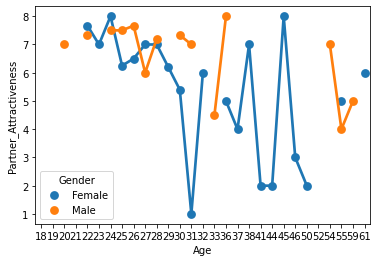

In [421]:
abc = data.groupby(['Age','Gender'], as_index=False).mean()
ax = sns.pointplot(x='Age', y='Partner_Attractiveness', hue='Gender', data=abc)

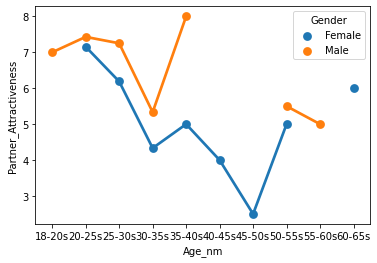

In [422]:
abc = data.groupby(['Age_nm','Gender'], as_index=False).mean()
ax = sns.pointplot(x='Age_nm', y='Partner_Attractiveness', hue='Gender', data=abc)

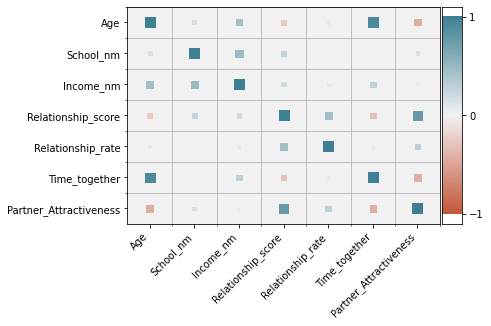

In [423]:
df_me_sin = data[['Age','School_nm','Income_nm','Relationship_score','Relationship_rate','Time_together','Partner_Attractiveness']]
corrplot(df_me_sin.corr(), size_scale=100, marker='s')  ## use in dataframe

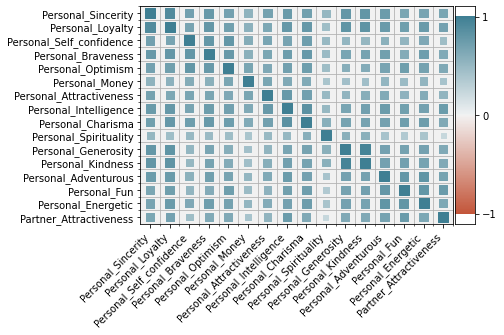

In [424]:
df_me_sin = data[['Personal_Sincerity','Personal_Loyalty','Personal_Self_confidence','Personal_Braveness','Personal_Optimism','Personal_Money','Personal_Attractiveness','Personal_Intelligence','Personal_Charisma','Personal_Spirituality','Personal_Generosity','Personal_Kindness','Personal_Adventurous','Personal_Fun','Personal_Energetic','Partner_Attractiveness']]
corrplot(df_me_sin.corr(), size_scale=100, marker='s')  ## use in dataframe

## Partner_Intelligence

In [425]:
anova_test('Partner_Intelligence', 'Age', data)

  Source  ddof1  ddof2      F  p-unc    np2
0    Age     24     45  2.926  0.001  0.609


In [426]:
anova_test('Partner_Intelligence', 'Age_nm', data)

   Source  ddof1  ddof2      F  p-unc   np2
0  Age_nm      9     60  3.595  0.001  0.35


In [427]:
anova_test('Partner_Intelligence', 'School_nm', data)

      Source  ddof1  ddof2     F  p-unc    np2
0  School_nm      5     64  2.85  0.022  0.182


In [428]:
anova_test('Partner_Intelligence', 'Income_nm', data)

      Source  ddof1  ddof2      F  p-unc    np2
0  Income_nm      6     63  1.531  0.183  0.127


In [429]:
anova_test('Partner_Intelligence', 'Gender', data)

   Source  ddof1  ddof2      F  p-unc    np2
0  Gender      1     68  1.064  0.306  0.015


In [430]:
anova_test('Partner_Intelligence', 'Relationship', data)

         Source  ddof1  ddof2  np2
0  Relationship      0     69  0.0


In [431]:
anova_test('Partner_Intelligence', 'Relationship_score', data)

               Source  ddof1  ddof2    F  p-unc    np2
0  Relationship_score     27     42  6.7    0.0  0.812


In [432]:
anova_test('Partner_Intelligence', 'Relationship_rate', data)

              Source  ddof1  ddof2      F  p-unc   np2
0  Relationship_rate      3     66  4.175  0.009  0.16


In [433]:
anova_test('Partner_Intelligence', 'Time_together', data)

          Source  ddof1  ddof2      F  p-unc   np2
0  Time_together     34     35  1.312  0.214  0.56


In [434]:
anova_test('Partner_Intelligence', ['Age','Gender'], data)

         Source        SS    DF       MS        F  p-unc    np2
0           Age  6428.418  24.0  267.851  127.231  0.000  0.989
1        Gender     0.143   1.0    0.143    0.068  0.796  0.002
2  Age * Gender   127.958  24.0    5.332    2.533  0.006  0.635
3      Residual    73.683  35.0    2.105      NaN    NaN    NaN


C:\Users\catar\anaconda3\envs\Ironhack\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 24, but rank is 11
  warnings.warn('covariance of constraints does not have full '


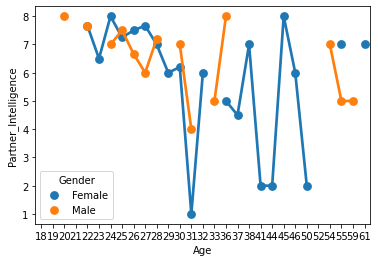

In [435]:
abc = data.groupby(['Age','Gender'], as_index=False).mean()
ax = sns.pointplot(x='Age', y='Partner_Intelligence', hue='Gender', data=abc)

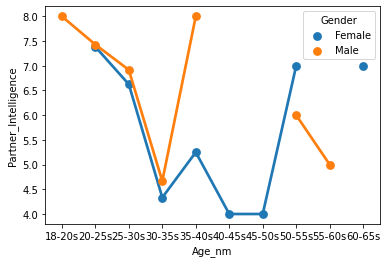

In [436]:
abc = data.groupby(['Age_nm','Gender'], as_index=False).mean()
ax = sns.pointplot(x='Age_nm', y='Partner_Intelligence', hue='Gender', data=abc)

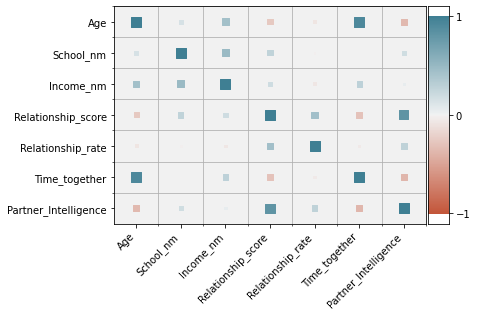

In [437]:
df_me_sin = data[['Age','School_nm','Income_nm','Relationship_score','Relationship_rate','Time_together','Partner_Intelligence']]
corrplot(df_me_sin.corr(), size_scale=100, marker='s')  ## use in dataframe

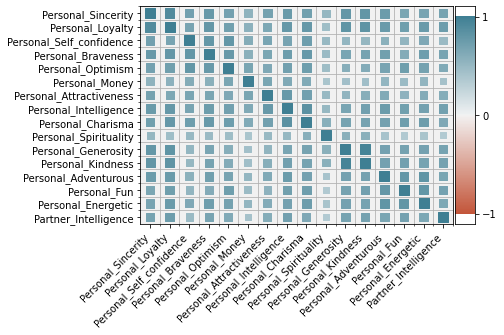

In [438]:
df_me_sin = data[['Personal_Sincerity','Personal_Loyalty','Personal_Self_confidence','Personal_Braveness','Personal_Optimism','Personal_Money','Personal_Attractiveness','Personal_Intelligence','Personal_Charisma','Personal_Spirituality','Personal_Generosity','Personal_Kindness','Personal_Adventurous','Personal_Fun','Personal_Energetic','Partner_Intelligence']]
corrplot(df_me_sin.corr(), size_scale=100, marker='s')  ## use in dataframe

## Partner_Charisma

In [439]:
anova_test('Partner_Charisma', 'Age', data)

  Source  ddof1  ddof2    F  p-unc    np2
0    Age     24     45  2.5  0.004  0.571


In [440]:
anova_test('Partner_Charisma', 'Age_nm', data)

   Source  ddof1  ddof2      F  p-unc    np2
0  Age_nm      9     60  3.261  0.003  0.328


In [441]:
anova_test('Partner_Charisma', 'School_nm', data)

      Source  ddof1  ddof2      F  p-unc    np2
0  School_nm      5     64  2.013  0.089  0.136


In [442]:
anova_test('Partner_Charisma', 'Income_nm', data)

      Source  ddof1  ddof2      F  p-unc    np2
0  Income_nm      6     63  1.178  0.329  0.101


In [443]:
anova_test('Partner_Charisma', 'Gender', data)

   Source  ddof1  ddof2      F  p-unc   np2
0  Gender      1     68  1.366  0.247  0.02


In [444]:
anova_test('Partner_Charisma', 'Relationship', data)

         Source  ddof1  ddof2  np2
0  Relationship      0     69  0.0


In [445]:
anova_test('Partner_Charisma', 'Relationship_score', data)

               Source  ddof1  ddof2      F  p-unc    np2
0  Relationship_score     27     42  4.886    0.0  0.759


In [446]:
anova_test('Partner_Charisma', 'Relationship_rate', data)

              Source  ddof1  ddof2      F  p-unc    np2
0  Relationship_rate      3     66  3.242  0.027  0.128


In [447]:
anova_test('Partner_Charisma', 'Time_together', data)

          Source  ddof1  ddof2      F  p-unc    np2
0  Time_together     34     35  1.386  0.171  0.574


In [448]:
anova_test('Partner_Charisma', ['Age','Gender'], data)

         Source        SS    DF       MS       F  p-unc    np2
0           Age  5571.269  24.0  232.136  90.125  0.000  0.984
1        Gender     0.046   1.0    0.046   0.018  0.894  0.001
2  Age * Gender   124.352  24.0    5.181   2.012  0.029  0.580
3      Residual    90.150  35.0    2.576     NaN    NaN    NaN


C:\Users\catar\anaconda3\envs\Ironhack\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 24, but rank is 11
  warnings.warn('covariance of constraints does not have full '


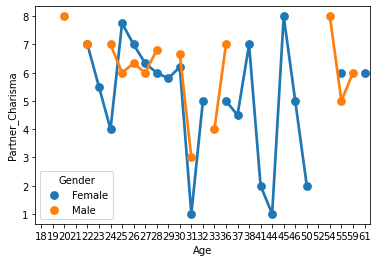

In [449]:
abc = data.groupby(['Age','Gender'], as_index=False).mean()
ax = sns.pointplot(x='Age', y='Partner_Charisma', hue='Gender', data=abc)

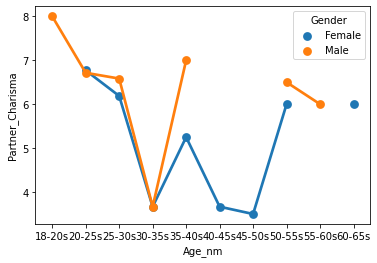

In [450]:
abc = data.groupby(['Age_nm','Gender'], as_index=False).mean()
ax = sns.pointplot(x='Age_nm', y='Partner_Charisma', hue='Gender', data=abc)

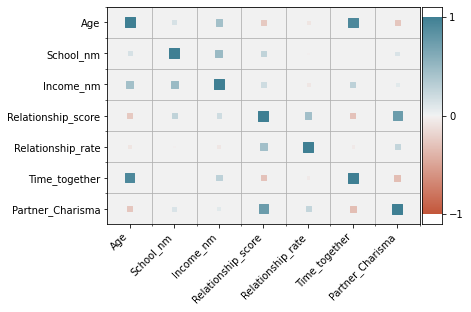

In [451]:
df_me_sin = data[['Age','School_nm','Income_nm','Relationship_score','Relationship_rate','Time_together','Partner_Charisma']]
corrplot(df_me_sin.corr(), size_scale=100, marker='s')  ## use in dataframe

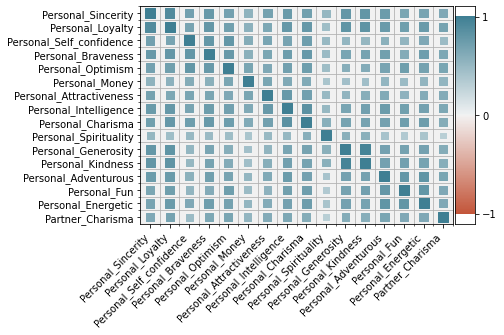

In [452]:
df_me_sin = data[['Personal_Sincerity','Personal_Loyalty','Personal_Self_confidence','Personal_Braveness','Personal_Optimism','Personal_Money','Personal_Attractiveness','Personal_Intelligence','Personal_Charisma','Personal_Spirituality','Personal_Generosity','Personal_Kindness','Personal_Adventurous','Personal_Fun','Personal_Energetic','Partner_Charisma']]
corrplot(df_me_sin.corr(), size_scale=100, marker='s')  ## use in dataframe

## Partner_Spirituality

In [453]:
anova_test('Partner_Spirituality', 'Age', data)

  Source  ddof1  ddof2      F  p-unc    np2
0    Age     24     45  0.995  0.491  0.347


In [454]:
anova_test('Partner_Spirituality', 'Age_nm', data)

   Source  ddof1  ddof2     F  p-unc    np2
0  Age_nm      9     60  1.28  0.266  0.161


In [455]:
anova_test('Partner_Spirituality', 'School_nm', data)

      Source  ddof1  ddof2      F  p-unc    np2
0  School_nm      5     64  1.522  0.196  0.106


In [456]:
anova_test('Partner_Spirituality', 'Income_nm', data)

      Source  ddof1  ddof2      F  p-unc    np2
0  Income_nm      6     63  1.628  0.154  0.134


In [457]:
anova_test('Partner_Spirituality', 'Gender', data)

   Source  ddof1  ddof2      F  p-unc    np2
0  Gender      1     68  21.23    0.0  0.238


In [458]:
anova_test('Partner_Spirituality', 'Relationship', data)

         Source  ddof1  ddof2  np2
0  Relationship      0     69  0.0


In [459]:
anova_test('Partner_Spirituality', 'Relationship_score', data)

               Source  ddof1  ddof2      F  p-unc    np2
0  Relationship_score     27     42  1.264  0.243  0.448


In [460]:
anova_test('Partner_Spirituality', 'Relationship_rate', data)

              Source  ddof1  ddof2      F  p-unc    np2
0  Relationship_rate      3     66  0.722  0.543  0.032


In [461]:
anova_test('Partner_Spirituality', 'Time_together', data)

          Source  ddof1  ddof2      F  p-unc    np2
0  Time_together     34     35  1.425  0.151  0.581


In [462]:
anova_test('Partner_Spirituality', ['Age','Gender'], data)

         Source        SS    DF       MS       F  p-unc    np2
0           Age  2481.947  24.0  103.414  22.310  0.000  0.939
1        Gender    56.050   1.0   56.050  12.092  0.001  0.257
2  Age * Gender   144.208  24.0    6.009   1.296  0.237  0.471
3      Residual   162.233  35.0    4.635     NaN    NaN    NaN


C:\Users\catar\anaconda3\envs\Ironhack\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 24, but rank is 11
  warnings.warn('covariance of constraints does not have full '


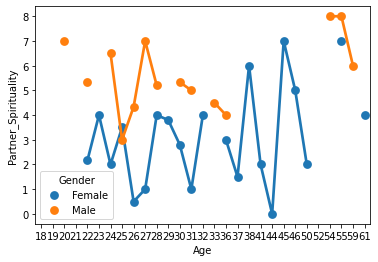

In [463]:
abc = data.groupby(['Age','Gender'], as_index=False).mean()
ax = sns.pointplot(x='Age', y='Partner_Spirituality', hue='Gender', data=abc)

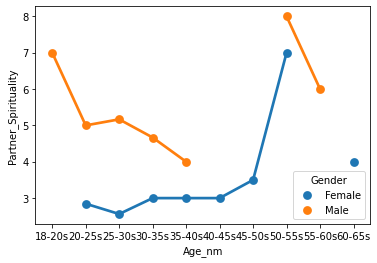

In [464]:
abc = data.groupby(['Age_nm','Gender'], as_index=False).mean()
ax = sns.pointplot(x='Age_nm', y='Partner_Spirituality', hue='Gender', data=abc)

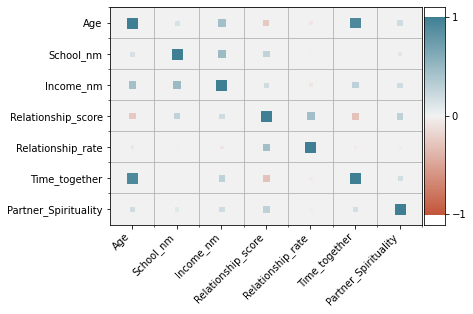

In [465]:
df_me_sin = data[['Age','School_nm','Income_nm','Relationship_score','Relationship_rate','Time_together','Partner_Spirituality']]
corrplot(df_me_sin.corr(), size_scale=100, marker='s')  ## use in dataframe

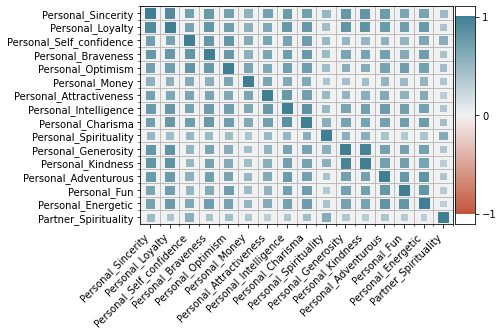

In [466]:
df_me_sin = data[['Personal_Sincerity','Personal_Loyalty','Personal_Self_confidence','Personal_Braveness','Personal_Optimism','Personal_Money','Personal_Attractiveness','Personal_Intelligence','Personal_Charisma','Personal_Spirituality','Personal_Generosity','Personal_Kindness','Personal_Adventurous','Personal_Fun','Personal_Energetic','Partner_Spirituality']]
corrplot(df_me_sin.corr(), size_scale=100, marker='s')  ## use in dataframe

## Partner_Generosity

In [467]:
anova_test('Partner_Generosity', 'Age', data)

  Source  ddof1  ddof2      F  p-unc   np2
0    Age     24     45  1.597  0.087  0.46


In [468]:
anova_test('Partner_Generosity', 'Age_nm', data)

   Source  ddof1  ddof2      F  p-unc   np2
0  Age_nm      9     60  2.597  0.013  0.28


In [469]:
anova_test('Partner_Generosity', 'School_nm', data)

      Source  ddof1  ddof2      F  p-unc    np2
0  School_nm      5     64  1.818  0.122  0.124


In [470]:
anova_test('Partner_Generosity', 'Income_nm', data)

      Source  ddof1  ddof2      F  p-unc    np2
0  Income_nm      6     63  1.541   0.18  0.128


In [471]:
anova_test('Partner_Generosity', 'Gender', data)

   Source  ddof1  ddof2      F  p-unc    np2
0  Gender      1     68  1.716  0.195  0.025


In [472]:
anova_test('Partner_Generosity', 'Relationship', data)

         Source  ddof1  ddof2  np2
0  Relationship      0     69  0.0


In [473]:
anova_test('Partner_Generosity', 'Relationship_score', data)

               Source  ddof1  ddof2     F  p-unc    np2
0  Relationship_score     27     42  5.15    0.0  0.768


In [474]:
anova_test('Partner_Generosity', 'Relationship_rate', data)

              Source  ddof1  ddof2      F  p-unc    np2
0  Relationship_rate      3     66  3.345  0.024  0.132


In [475]:
anova_test('Partner_Generosity', 'Time_together', data)

          Source  ddof1  ddof2     F  p-unc    np2
0  Time_together     34     35  1.08   0.41  0.512


In [476]:
anova_test('Partner_Generosity', ['Age','Gender'], data)

         Source        SS    DF       MS       F  p-unc    np2
0           Age  5871.043  24.0  244.627  65.176  0.000  0.978
1        Gender     0.079   1.0    0.079   0.021  0.886  0.001
2  Age * Gender   143.739  24.0    5.989   1.596  0.102  0.522
3      Residual   131.367  35.0    3.753     NaN    NaN    NaN


C:\Users\catar\anaconda3\envs\Ironhack\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 24, but rank is 11
  warnings.warn('covariance of constraints does not have full '


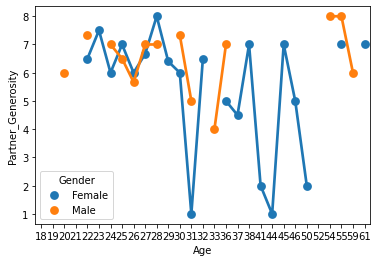

In [477]:
abc = data.groupby(['Age','Gender'], as_index=False).mean()
ax = sns.pointplot(x='Age', y='Partner_Generosity', hue='Gender', data=abc)

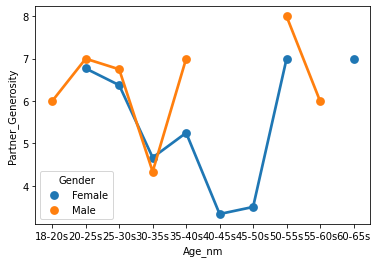

In [478]:
abc = data.groupby(['Age_nm','Gender'], as_index=False).mean()
ax = sns.pointplot(x='Age_nm', y='Partner_Generosity', hue='Gender', data=abc)

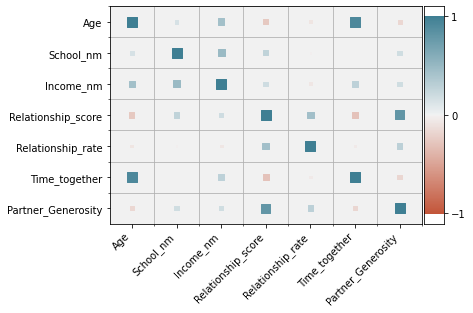

In [479]:
df_me_sin = data[['Age','School_nm','Income_nm','Relationship_score','Relationship_rate','Time_together','Partner_Generosity']]
corrplot(df_me_sin.corr(), size_scale=100, marker='s')  ## use in dataframe

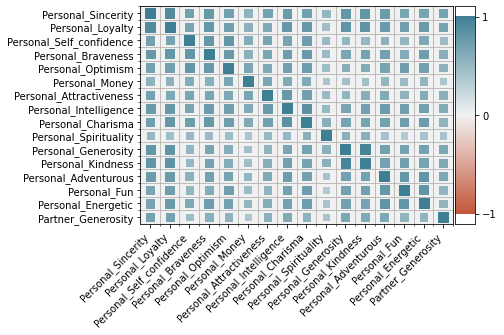

In [480]:
df_me_sin = data[['Personal_Sincerity','Personal_Loyalty','Personal_Self_confidence','Personal_Braveness','Personal_Optimism','Personal_Money','Personal_Attractiveness','Personal_Intelligence','Personal_Charisma','Personal_Spirituality','Personal_Generosity','Personal_Kindness','Personal_Adventurous','Personal_Fun','Personal_Energetic','Partner_Generosity']]
corrplot(df_me_sin.corr(), size_scale=100, marker='s')  ## use in dataframe

## Partner_Kindness

In [481]:
anova_test('Partner_Kindness', 'Age', data)

  Source  ddof1  ddof2      F  p-unc    np2
0    Age     24     45  1.538  0.105  0.451


In [482]:
anova_test('Partner_Kindness', 'Age_nm', data)

   Source  ddof1  ddof2      F  p-unc    np2
0  Age_nm      9     60  2.836  0.008  0.298


In [483]:
anova_test('Partner_Kindness', 'School_nm', data)

      Source  ddof1  ddof2      F  p-unc    np2
0  School_nm      5     64  2.057  0.082  0.138


In [484]:
anova_test('Partner_Kindness', 'Income_nm', data)

      Source  ddof1  ddof2      F  p-unc    np2
0  Income_nm      6     63  1.231  0.302  0.105


In [485]:
anova_test('Partner_Kindness', 'Gender', data)

   Source  ddof1  ddof2      F  p-unc    np2
0  Gender      1     68  1.555  0.217  0.022


In [486]:
anova_test('Partner_Kindness', 'Relationship', data)

         Source  ddof1  ddof2  np2
0  Relationship      0     69  0.0


In [487]:
anova_test('Partner_Kindness', 'Relationship_score', data)

               Source  ddof1  ddof2      F  p-unc   np2
0  Relationship_score     27     42  8.845    0.0  0.85


In [488]:
anova_test('Partner_Kindness', 'Relationship_rate', data)

              Source  ddof1  ddof2      F  p-unc    np2
0  Relationship_rate      3     66  3.826  0.014  0.148


In [489]:
anova_test('Partner_Kindness', 'Time_together', data)

          Source  ddof1  ddof2      F  p-unc    np2
0  Time_together     34     35  0.992  0.508  0.491


In [490]:
anova_test('Partner_Kindness', ['Age','Gender'], data)

         Source        SS    DF       MS       F  p-unc    np2
0           Age  6387.832  24.0  266.160  78.701  0.000  0.982
1        Gender     0.004   1.0    0.004   0.001  0.972  0.000
2  Age * Gender   161.877  24.0    6.745   1.994  0.031  0.578
3      Residual   118.367  35.0    3.382     NaN    NaN    NaN


C:\Users\catar\anaconda3\envs\Ironhack\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 24, but rank is 11
  warnings.warn('covariance of constraints does not have full '


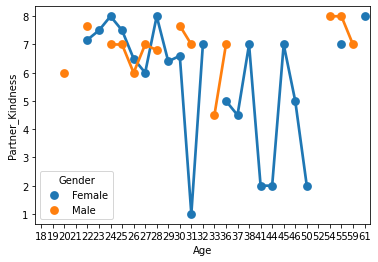

In [491]:
abc = data.groupby(['Age','Gender'], as_index=False).mean()
ax = sns.pointplot(x='Age', y='Partner_Kindness', hue='Gender', data=abc)

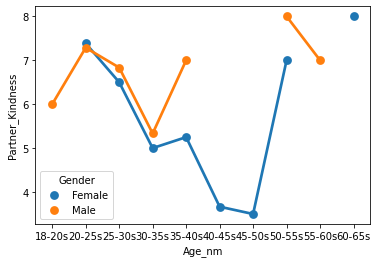

In [492]:
abc = data.groupby(['Age_nm','Gender'], as_index=False).mean()
ax = sns.pointplot(x='Age_nm', y='Partner_Kindness', hue='Gender', data=abc)

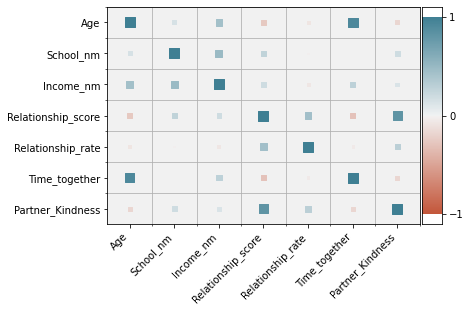

In [493]:
df_me_sin = data[['Age','School_nm','Income_nm','Relationship_score','Relationship_rate','Time_together','Partner_Kindness']]
corrplot(df_me_sin.corr(), size_scale=100, marker='s')  ## use in dataframe

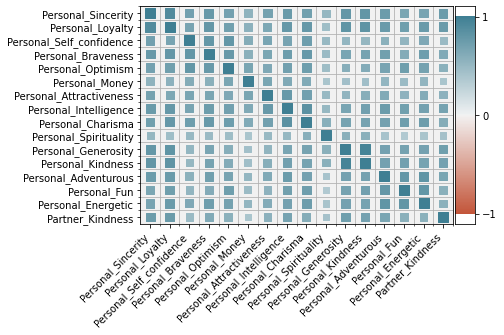

In [494]:
df_me_sin = data[['Personal_Sincerity','Personal_Loyalty','Personal_Self_confidence','Personal_Braveness','Personal_Optimism','Personal_Money','Personal_Attractiveness','Personal_Intelligence','Personal_Charisma','Personal_Spirituality','Personal_Generosity','Personal_Kindness','Personal_Adventurous','Personal_Fun','Personal_Energetic','Partner_Kindness']]
corrplot(df_me_sin.corr(), size_scale=100, marker='s')  ## use in dataframe

## Partner_Adventurous

In [495]:
anova_test('Partner_Adventurous', 'Age', data)

  Source  ddof1  ddof2      F  p-unc    np2
0    Age     24     45  1.192  0.299  0.389


In [496]:
anova_test('Partner_Adventurous', 'Age_nm', data)

   Source  ddof1  ddof2      F  p-unc    np2
0  Age_nm      9     60  0.853  0.571  0.113


In [497]:
anova_test('Partner_Adventurous', 'School_nm', data)

      Source  ddof1  ddof2      F  p-unc    np2
0  School_nm      5     64  1.023  0.411  0.074


In [498]:
anova_test('Partner_Adventurous', 'Income_nm', data)

      Source  ddof1  ddof2      F  p-unc    np2
0  Income_nm      6     63  3.084   0.01  0.227


In [499]:
anova_test('Partner_Adventurous', 'Gender', data)

   Source  ddof1  ddof2      F  p-unc    np2
0  Gender      1     68  0.563  0.456  0.008


In [500]:
anova_test('Partner_Adventurous', 'Relationship', data)

         Source  ddof1  ddof2  np2
0  Relationship      0     69  0.0


In [501]:
anova_test('Partner_Adventurous', 'Relationship_score', data)

               Source  ddof1  ddof2      F  p-unc    np2
0  Relationship_score     27     42  3.235    0.0  0.675


In [502]:
anova_test('Partner_Adventurous', 'Relationship_rate', data)

              Source  ddof1  ddof2      F  p-unc   np2
0  Relationship_rate      3     66  1.905  0.137  0.08


In [503]:
anova_test('Partner_Adventurous', 'Time_together', data)

          Source  ddof1  ddof2      F  p-unc    np2
0  Time_together     34     35  0.869  0.659  0.458


In [504]:
anova_test('Partner_Adventurous', ['Age','Gender'], data)

         Source        SS    DF       MS       F  p-unc    np2
0           Age  4500.388  24.0  187.516  43.599  0.000  0.968
1        Gender     0.357   1.0    0.357   0.083  0.775  0.002
2  Age * Gender   135.789  24.0    5.658   1.315  0.225  0.474
3      Residual   150.533  35.0    4.301     NaN    NaN    NaN


C:\Users\catar\anaconda3\envs\Ironhack\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 24, but rank is 11
  warnings.warn('covariance of constraints does not have full '


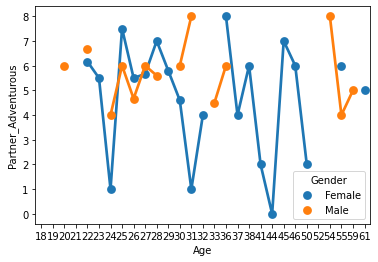

In [505]:
abc = data.groupby(['Age','Gender'], as_index=False).mean()
ax = sns.pointplot(x='Age', y='Partner_Adventurous', hue='Gender', data=abc)

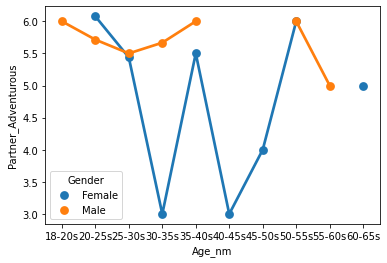

In [506]:
abc = data.groupby(['Age_nm','Gender'], as_index=False).mean()
ax = sns.pointplot(x='Age_nm', y='Partner_Adventurous', hue='Gender', data=abc)

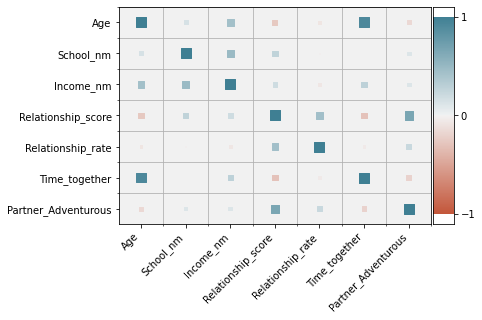

In [507]:
df_me_sin = data[['Age','School_nm','Income_nm','Relationship_score','Relationship_rate','Time_together','Partner_Adventurous']]
corrplot(df_me_sin.corr(), size_scale=100, marker='s')  ## use in dataframe

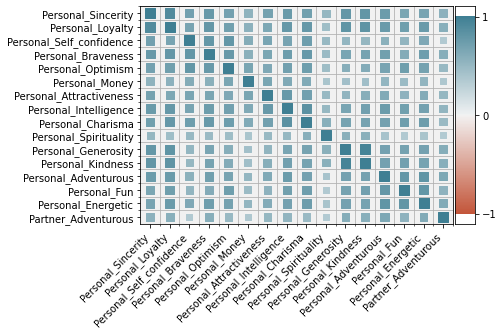

In [508]:
df_me_sin = data[['Personal_Sincerity','Personal_Loyalty','Personal_Self_confidence','Personal_Braveness','Personal_Optimism','Personal_Money','Personal_Attractiveness','Personal_Intelligence','Personal_Charisma','Personal_Spirituality','Personal_Generosity','Personal_Kindness','Personal_Adventurous','Personal_Fun','Personal_Energetic','Partner_Adventurous']]
corrplot(df_me_sin.corr(), size_scale=100, marker='s')  ## use in dataframe

## Partner_Fun

In [509]:
anova_test('Partner_Fun', 'Age', data)

  Source  ddof1  ddof2      F  p-unc    np2
0    Age     24     45  2.135  0.014  0.532


In [510]:
anova_test('Partner_Fun', 'Age_nm', data)

   Source  ddof1  ddof2      F  p-unc   np2
0  Age_nm      9     60  2.469  0.018  0.27


In [511]:
anova_test('Partner_Fun', 'School_nm', data)

      Source  ddof1  ddof2      F  p-unc    np2
0  School_nm      5     64  2.338  0.052  0.154


In [512]:
anova_test('Partner_Fun', 'Income_nm', data)

      Source  ddof1  ddof2    F  p-unc    np2
0  Income_nm      6     63  1.8  0.113  0.146


In [513]:
anova_test('Partner_Fun', 'Gender', data)

   Source  ddof1  ddof2      F  p-unc    np2
0  Gender      1     68  0.079   0.78  0.001


In [514]:
anova_test('Partner_Fun', 'Relationship', data)

         Source  ddof1  ddof2  np2
0  Relationship      0     69  0.0


In [515]:
anova_test('Partner_Fun', 'Relationship_score', data)

               Source  ddof1  ddof2      F  p-unc    np2
0  Relationship_score     27     42  7.043    0.0  0.819


In [516]:
anova_test('Partner_Fun', 'Relationship_rate', data)

              Source  ddof1  ddof2      F  p-unc    np2
0  Relationship_rate      3     66  3.389  0.023  0.133


In [517]:
anova_test('Partner_Fun', 'Time_together', data)

          Source  ddof1  ddof2      F  p-unc    np2
0  Time_together     34     35  0.935  0.577  0.476


In [518]:
anova_test('Partner_Fun', ['Age','Gender'], data)

         Source        SS    DF       MS       F  p-unc    np2
0           Age  5794.459  24.0  241.436  77.894  0.000  0.982
1        Gender     1.201   1.0    1.201   0.388  0.538  0.011
2  Age * Gender   116.723  24.0    4.863   1.569  0.110  0.518
3      Residual   108.483  35.0    3.100     NaN    NaN    NaN


C:\Users\catar\anaconda3\envs\Ironhack\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 24, but rank is 11
  warnings.warn('covariance of constraints does not have full '


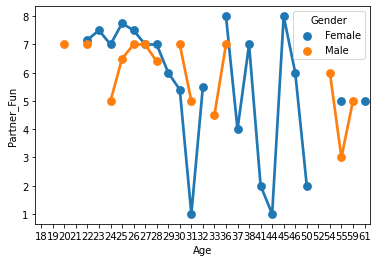

In [519]:
abc = data.groupby(['Age','Gender'], as_index=False).mean()
ax = sns.pointplot(x='Age', y='Partner_Fun', hue='Gender', data=abc)

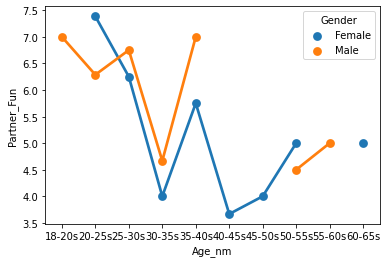

In [520]:
abc = data.groupby(['Age_nm','Gender'], as_index=False).mean()
ax = sns.pointplot(x='Age_nm', y='Partner_Fun', hue='Gender', data=abc)

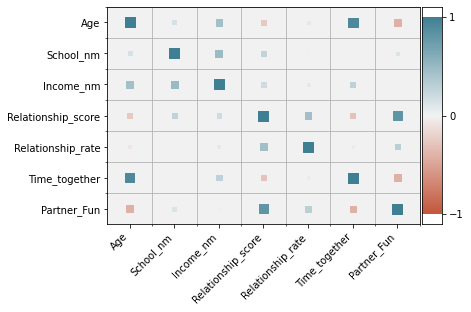

In [521]:
df_me_sin = data[['Age','School_nm','Income_nm','Relationship_score','Relationship_rate','Time_together','Partner_Fun']]
corrplot(df_me_sin.corr(), size_scale=100, marker='s')  ## use in dataframe

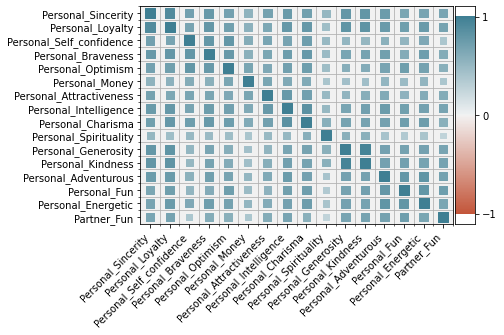

In [522]:
df_me_sin = data[['Personal_Sincerity','Personal_Loyalty','Personal_Self_confidence','Personal_Braveness','Personal_Optimism','Personal_Money','Personal_Attractiveness','Personal_Intelligence','Personal_Charisma','Personal_Spirituality','Personal_Generosity','Personal_Kindness','Personal_Adventurous','Personal_Fun','Personal_Energetic','Partner_Fun']]
corrplot(df_me_sin.corr(), size_scale=100, marker='s')  ## use in dataframe

## Partner_Energetic

In [523]:
anova_test('Partner_Energetic', 'Age', data)

  Source  ddof1  ddof2      F  p-unc    np2
0    Age     24     45  1.611  0.083  0.462


In [524]:
anova_test('Partner_Energetic', 'Age_nm', data)

   Source  ddof1  ddof2      F  p-unc   np2
0  Age_nm      9     60  0.995  0.454  0.13


In [525]:
anova_test('Partner_Energetic', 'School_nm', data)

      Source  ddof1  ddof2      F  p-unc    np2
0  School_nm      5     64  1.537  0.191  0.107


In [526]:
anova_test('Partner_Energetic', 'Income_nm', data)

      Source  ddof1  ddof2      F  p-unc    np2
0  Income_nm      6     63  2.167  0.058  0.171


In [527]:
anova_test('Partner_Energetic', 'Gender', data)

   Source  ddof1  ddof2      F  p-unc  np2
0  Gender      1     68  0.002  0.968  0.0


In [528]:
anova_test('Partner_Energetic', 'Relationship', data)

         Source  ddof1  ddof2  np2
0  Relationship      0     69  0.0


In [529]:
anova_test('Partner_Energetic', 'Relationship_score', data)

               Source  ddof1  ddof2      F  p-unc    np2
0  Relationship_score     27     42  4.627    0.0  0.748


In [530]:
anova_test('Partner_Energetic', 'Relationship_rate', data)

              Source  ddof1  ddof2      F  p-unc    np2
0  Relationship_rate      3     66  2.122  0.106  0.088


In [531]:
anova_test('Partner_Energetic', 'Time_together', data)

          Source  ddof1  ddof2      F  p-unc    np2
0  Time_together     34     35  0.798  0.743  0.437


In [532]:
anova_test('Partner_Energetic', ['Age','Gender'], data)

         Source        SS    DF       MS       F  p-unc    np2
0           Age  4680.557  24.0  195.023  50.319  0.000  0.972
1        Gender     2.227   1.0    2.227   0.575  0.454  0.016
2  Age * Gender   167.095  24.0    6.962   1.796  0.056  0.552
3      Residual   135.650  35.0    3.876     NaN    NaN    NaN


C:\Users\catar\anaconda3\envs\Ironhack\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 24, but rank is 11
  warnings.warn('covariance of constraints does not have full '


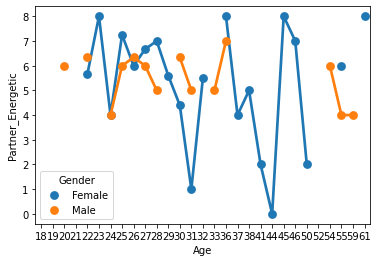

In [533]:
abc = data.groupby(['Age','Gender'], as_index=False).mean()
ax = sns.pointplot(x='Age', y='Partner_Energetic', hue='Gender', data=abc)

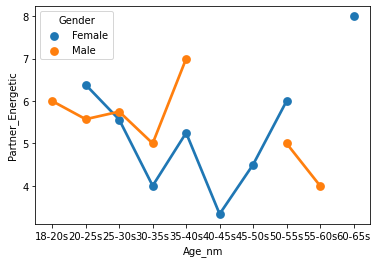

In [534]:
abc = data.groupby(['Age_nm','Gender'], as_index=False).mean()
ax = sns.pointplot(x='Age_nm', y='Partner_Energetic', hue='Gender', data=abc)

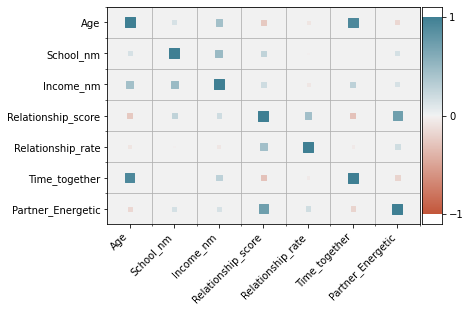

In [535]:
df_me_sin = data[['Age','School_nm','Income_nm','Relationship_score','Relationship_rate','Time_together','Partner_Energetic']]
corrplot(df_me_sin.corr(), size_scale=100, marker='s')  ## use in dataframe

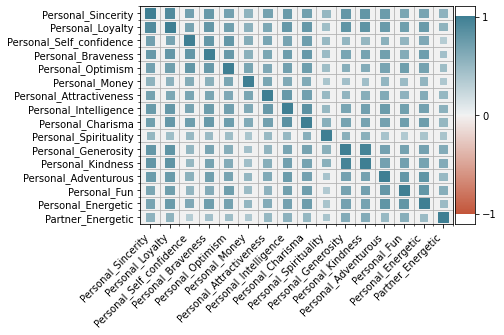

In [536]:
df_me_sin = data[['Personal_Sincerity','Personal_Loyalty','Personal_Self_confidence','Personal_Braveness','Personal_Optimism','Personal_Money','Personal_Attractiveness','Personal_Intelligence','Personal_Charisma','Personal_Spirituality','Personal_Generosity','Personal_Kindness','Personal_Adventurous','Personal_Fun','Personal_Energetic','Partner_Energetic']]
corrplot(df_me_sin.corr(), size_scale=100, marker='s')  ## use in dataframe